# Characterising Saturn's Bow Shock Using Cassini Spacecraft Data

###### Authors: Zake Ahmed, Kejian Shi, Jaime Sabal, Sean Bermingham, Gaurav Mehan, Tarkan Yzeiri, Daniel Duhnev
###### Board Member: Nick Achilleos

##### Introduction: 

###### Import Necessary Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

import pandas as pd
import csv

from scipy import signal

#%matplotlib notebook


import requests

import math
from datetime import datetime, date, timedelta
from scipy.signal import find_peaks
from matplotlib import gridspec
from matplotlib.pyplot import MultipleLocator
from scipy import ndimage

from scipy import stats

from scipy.stats import maxwell
from scipy.stats import chisquare
from scipy.stats import ks_2samp



import Functions #import the functions we created



In [0]:
def get_data(year):
    """Retrieves data from Cassini's Saturn orbits for a given year."""
    #Filename
    filename = str(year) + "_FGM_KSM_1M.TAB"

    #Retrieve data from csv file in pandas dataframe
    df = pd.read_csv(filename, infer_datetime_format=True, sep='\s+', names=["Time","BX","BY","BZ","Btotal","X","Y",'Z','LocalHour','NPTS'], engine='python')
    return df


In [0]:
#retrieve data
year = 2005


data = get_data(year)

In [38]:
#Set the index as the 'Time' column
data["Time"] = pd.to_datetime(data["Time"], format='%Y/%m/%d %H:%M:%S')
data = data.set_index("Time")
data


KeyError: 'Time'

In [40]:
#get x and y and define new variable Rs
y = data['Y']


z = data['Z']

data['Rs'] = ((z*z)+(y*y))**0.5

Rs = data['Rs'].to_numpy()

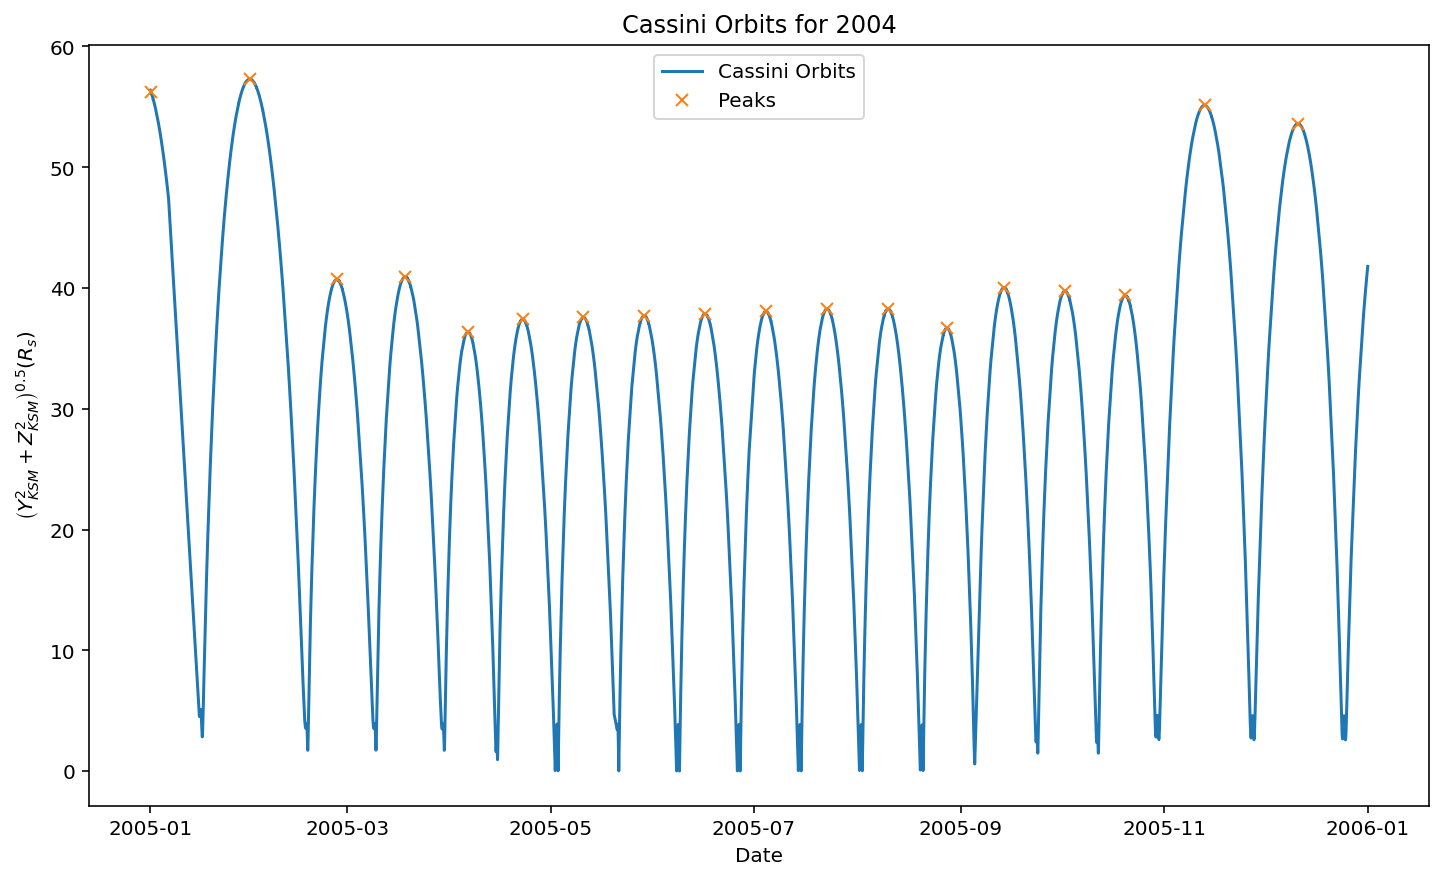

In [41]:
peaks,_ = find_peaks(Rs, height=30, distance=19000) #find peaks in orbits

#plot all Casinni orbits in specified year showing peaks
plt.figure()
plt.plot(data.index,Rs, label="Cassini Orbits")
plt.plot(data.index[peaks], Rs[peaks], "x", label="Peaks")
plt.xlabel("Date")
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{0.5} \left(R_s\right)$")
plt.title("Cassini Orbits for %s"%year)
plt.legend();

print(peaks)
for peak in peaks:
    print(data["Time"][peak])

$$R_s = \sqrt{z^2+y^2}$$
$$Elevation = arctan(\frac{B_Z}{\sqrt{B_X^2+B_Y^2}})$$
$$Azimuth = arctan(\frac{-B_X}{\sqrt{B_X^2+B_Y^2}})$$

In [42]:
def get_data2(year):
    """Retrieves data from Cassini's Saturn orbits for a given year."""
    #Filename
    filename = str(year) + "_FGM_KSM_1M.TAB"

    #Retrieve data from csv file in pandas dataframe
    data = pd.read_csv(filename, infer_datetime_format=True, sep='\s+', names=["Time","BX","BY","BZ","Btotal","X","Y",'Z','LocalHour','NPTS'], engine='python')
    data["Time"] = pd.to_datetime(data["Time"], format='%Y/%m/%d %H:%M:%S')
    data = data.set_index("Time")
    y = data['Y']
    z = data['Z']
    data['Rs'] = ((z*z)+(y*y))**0.5

    data["Elevation"] = np.degrees(np.arctan(data["BZ"]/(data["BX"]**2 + data["BY"]**2)**0.5))
    data["Azimuth"] = np.degrees(np.arccos(-data["BX"]/(data["BX"]**2 + data["BY"]**2)**0.5))
    return data

In [44]:
#Define function that retrieves a given orbit from the calculated peaks
def getorbit(year, n):
    """Gets an orbit from the specified year."""
    data2=get_data2(year)
    Rs = data2['Rs'].to_numpy()
    peaks,_ = find_peaks(Rs, height=12, distance=10000)
    orbit = data2[peaks[n-1]:peaks[n]]


    return orbit

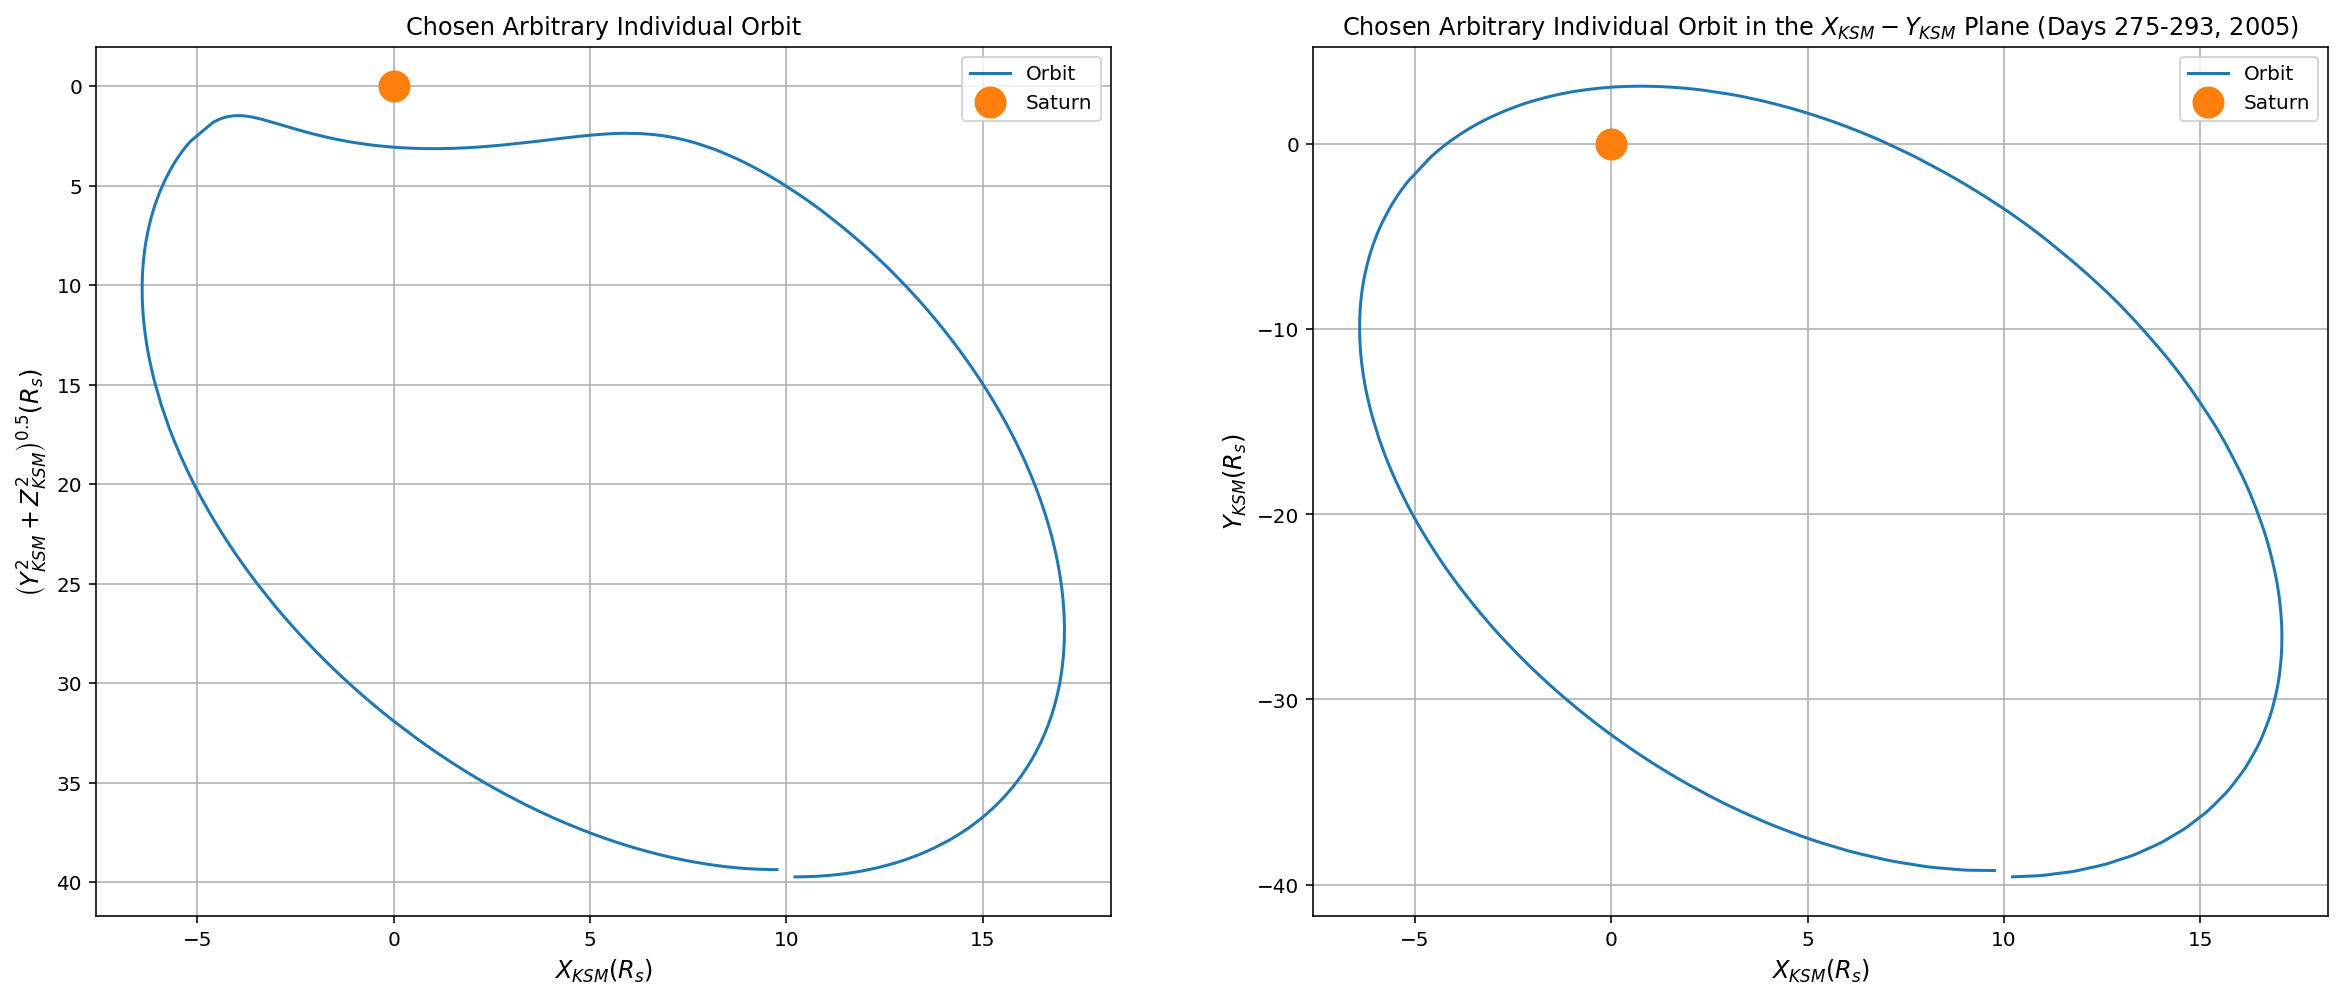

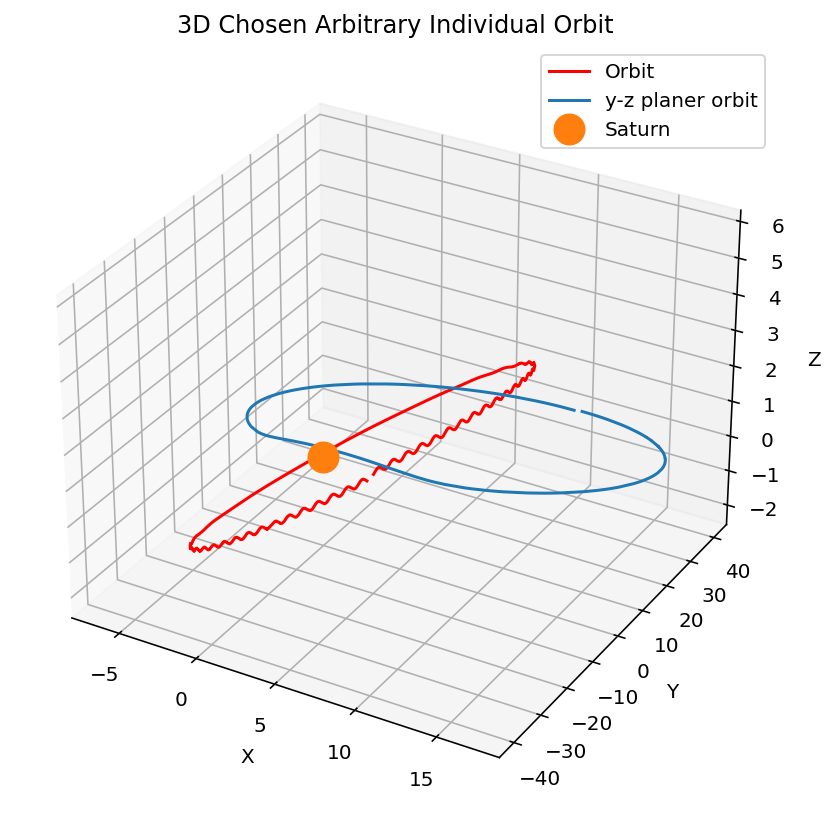

In [45]:
#retrieve an arbitrary orbit
orbit1 = getorbit(2005, 15)

saturn_centre = [0,0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax[0].plot(orbit1['X'], orbit1['Rs'], label="Orbit")
ax[0].plot(saturn_centre[0], saturn_centre[1],'o',markersize=15,label='Saturn')
ax[0].grid()
ax[0].invert_yaxis()
ax[0].set_title("Chosen Arbitrary Individual Orbit", fontsize=12)
ax[0].set_xlabel(r"$X_{KSM}  \left(R_s\right)$", fontsize=12)
ax[0].set_ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{0.5} \left(R_s\right)$", fontsize=12)
ax[0].legend();


ax[1].plot(orbit1['X'], orbit1['Y'], label="Orbit")
ax[1].plot(saturn_centre[0], saturn_centre[1],'o',markersize=15, label='Saturn')
ax[1].grid()
ax[1].set_title(r"Chosen Arbitrary Individual Orbit in the $X_{KSM}-Y_{KSM}$ Plane (Days 275-293, 2005)", fontsize=12)
ax[1].set_xlabel(r"$X_{KSM}  \left(R_s\right)$", fontsize=12)
ax[1].set_ylabel(r"$Y_{KSM}  \left(R_s\right)$", fontsize=12)
ax[1].legend();
plt.savefig("arbitrary_orbit.png")
## 3d representation
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(orbit1['X'], orbit1['Y'], orbit1['Z'],color='r',label='Orbit')
ax.plot(orbit1['X'],orbit1['Rs'],label='y-z planer orbit')
ax.plot(0,0,0,'o',markersize=15, label='Saturn')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3D Chosen Arbitrary Individual Orbit")
ax.legend()
plt.show()


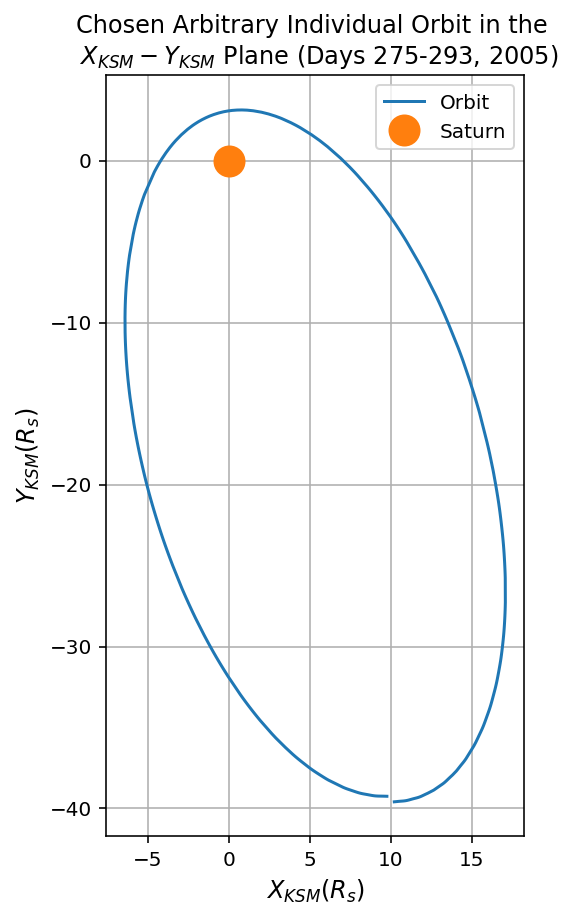

In [47]:
plt.figure()
plt.plot(orbit1['X'], orbit1['Y'], label="Orbit")
plt.plot(saturn_centre[0], saturn_centre[1],'o',markersize=15, label='Saturn')
plt.grid()
plt.title("Chosen Arbitrary Individual Orbit in the \n $X_{KSM}-Y_{KSM}$ Plane (Days 275-293, 2005)", fontsize=12)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$", fontsize=12)
plt.ylabel(r"$Y_{KSM}  \left(R_s\right)$", fontsize=12)
plt.legend();
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig("arbitrary_orbit_report.png")

In [11]:
print(orbit1)

                        BX     BY     BZ  Btotal       X       Y      Z  \
Time                                                                      
2005-10-02 05:42:30  1.235  1.665 -0.314   2.097  10.217 -39.587  3.500   
2005-10-02 05:43:30  1.251  1.663 -0.342   2.109  10.219 -39.586  3.501   
2005-10-02 05:44:30  1.247  1.667 -0.376   2.116  10.220 -39.586  3.502   
2005-10-02 05:45:30  1.257  1.639 -0.390   2.102  10.221 -39.586  3.503   
2005-10-02 05:46:30  1.262  1.645 -0.394   2.111  10.223 -39.586  3.505   
...                    ...    ...    ...     ...     ...     ...    ...   
2005-10-20 06:53:30 -0.586 -0.827  0.023   1.025   9.753 -39.244  3.243   
2005-10-20 06:54:30 -0.409 -0.570  0.317   0.788   9.755 -39.244  3.243   
2005-10-20 06:55:30 -0.255 -0.548  0.194   0.672   9.756 -39.244  3.242   
2005-10-20 06:56:30 -0.422 -0.679  0.189   0.827   9.758 -39.245  3.242   
2005-10-20 06:57:30 -0.350 -0.599  0.235   0.736   9.759 -39.245  3.242   

                     Loc

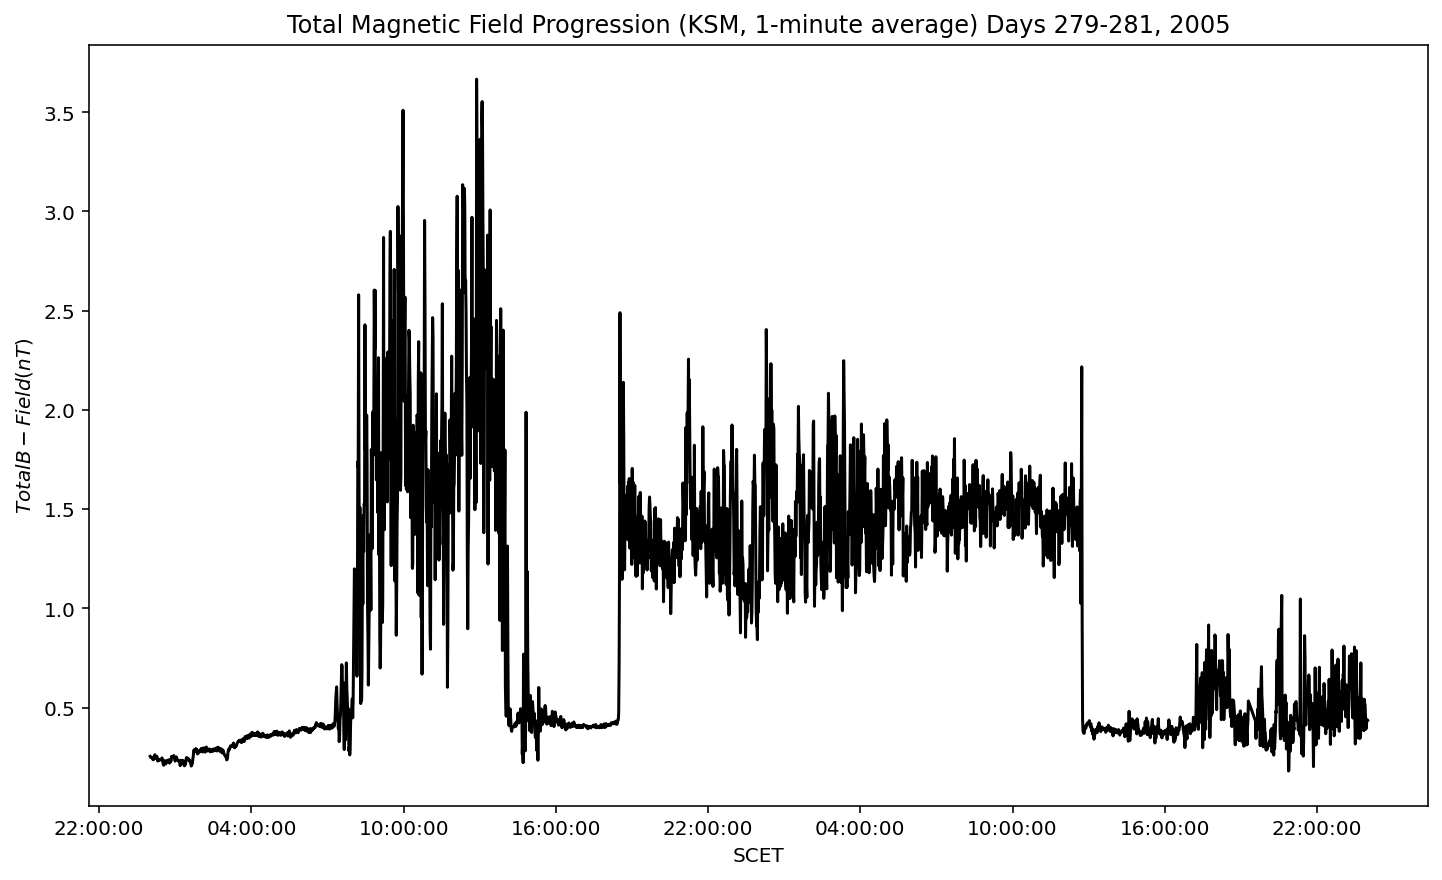

In [12]:
#define limits of plot
start_day = 279
end_day = 281

#calculate start and end dates as well as their indices
first_day = datetime(int(year), 1, 1)
start_date = pd.Timestamp(first_day + timedelta(start_day-1, 30))
start_index = list(data.index).index(start_date)
end_date = pd.Timestamp(first_day + timedelta(end_day-1, 30))
end_index = list(data.index).index(end_date)

#retrieve data for specified days for B_tot, Elevation, and Azimuth
timeframe = data.index[start_index:end_index]
B_tot = data["Btotal"][start_index:end_index]

#plot total B field for the orbit
fig, ax = plt.subplots()

hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(timeframe, B_tot, "black", label="$B_{tot}$")
ax.set_title("Total Magnetic Field Progression (KSM, 1-minute average) Days %s-%s, %s"%(str(start_day), str(end_day), str(year)))
ax.set_xlabel('SCET')
ax.set_ylabel(r'$Total B-Field \left(nT\right)$')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt);

### Calculating the Elevation and Azimuthal Angles:

The elevation angle $\lambda$ is defined as the angle between the field vector $B_z$ and its projection onto the XY plane. This definition implies that $\lambda$ is given by the equation: 

$$ \lambda = \arctan\left(\frac{B_z}{\left(B_x^2 + B_y^2\right)^\frac{1}{2}}\right) \tag{1}$$

where $B_x$, $B_y$, and $B_z$ are the components of the magnetic field in the KSM coordinate system. Moreover, we define the azimuthal angle $\delta$ as the angle between the anti-sunward direction (i.e $-x$) and the projection of the field onto the XY plane such that: 

$$ \delta = \arccos\left(\frac{-B_x}{\left(B_x^2 + B_y^2\right)^\frac{1}{2}}\right) \tag{2}$$

In the code cell below we add columns for these two angles to our data frame for the specified year and plot them afterwards. 

In [13]:
#create columns for angles in question
data["Elevation"] = np.degrees(np.arctan(data["BZ"]/(data["BX"]**2 + data["BY"]**2)**0.5))
data["Azimuth"] = np.degrees(np.arccos(-data["BX"]/(data["BX"]**2 + data["BY"]**2)**0.5))

print(data)

                        BX     BY     BZ  Btotal       X       Y      Z  \
Time                                                                      
2005-01-01 00:00:30 -0.121 -0.378 -0.210   0.450  19.440 -56.253  3.745   
2005-01-01 00:01:30 -0.119 -0.380 -0.206   0.449  19.441 -56.253  3.745   
2005-01-01 00:02:30 -0.123 -0.370 -0.215   0.446  19.442 -56.252  3.746   
2005-01-01 00:03:30 -0.113 -0.371 -0.208   0.441  19.443 -56.252  3.746   
2005-01-01 00:04:30 -0.119 -0.363 -0.228   0.445  19.444 -56.251  3.746   
...                    ...    ...    ...     ...     ...     ...    ...   
2005-12-31 23:55:30  1.644  1.946 -0.423   2.583 -11.056 -41.606 -3.803   
2005-12-31 23:56:30  1.671  1.912 -0.423   2.574 -11.055 -41.608 -3.803   
2005-12-31 23:57:30  1.664  1.936 -0.454   2.593 -11.054 -41.610 -3.803   
2005-12-31 23:58:30  1.685  1.966 -0.388   2.618 -11.053 -41.612 -3.803   
2005-12-31 23:59:30  1.705  1.976 -0.333   2.631 -11.052 -41.614 -3.803   

                     Loc

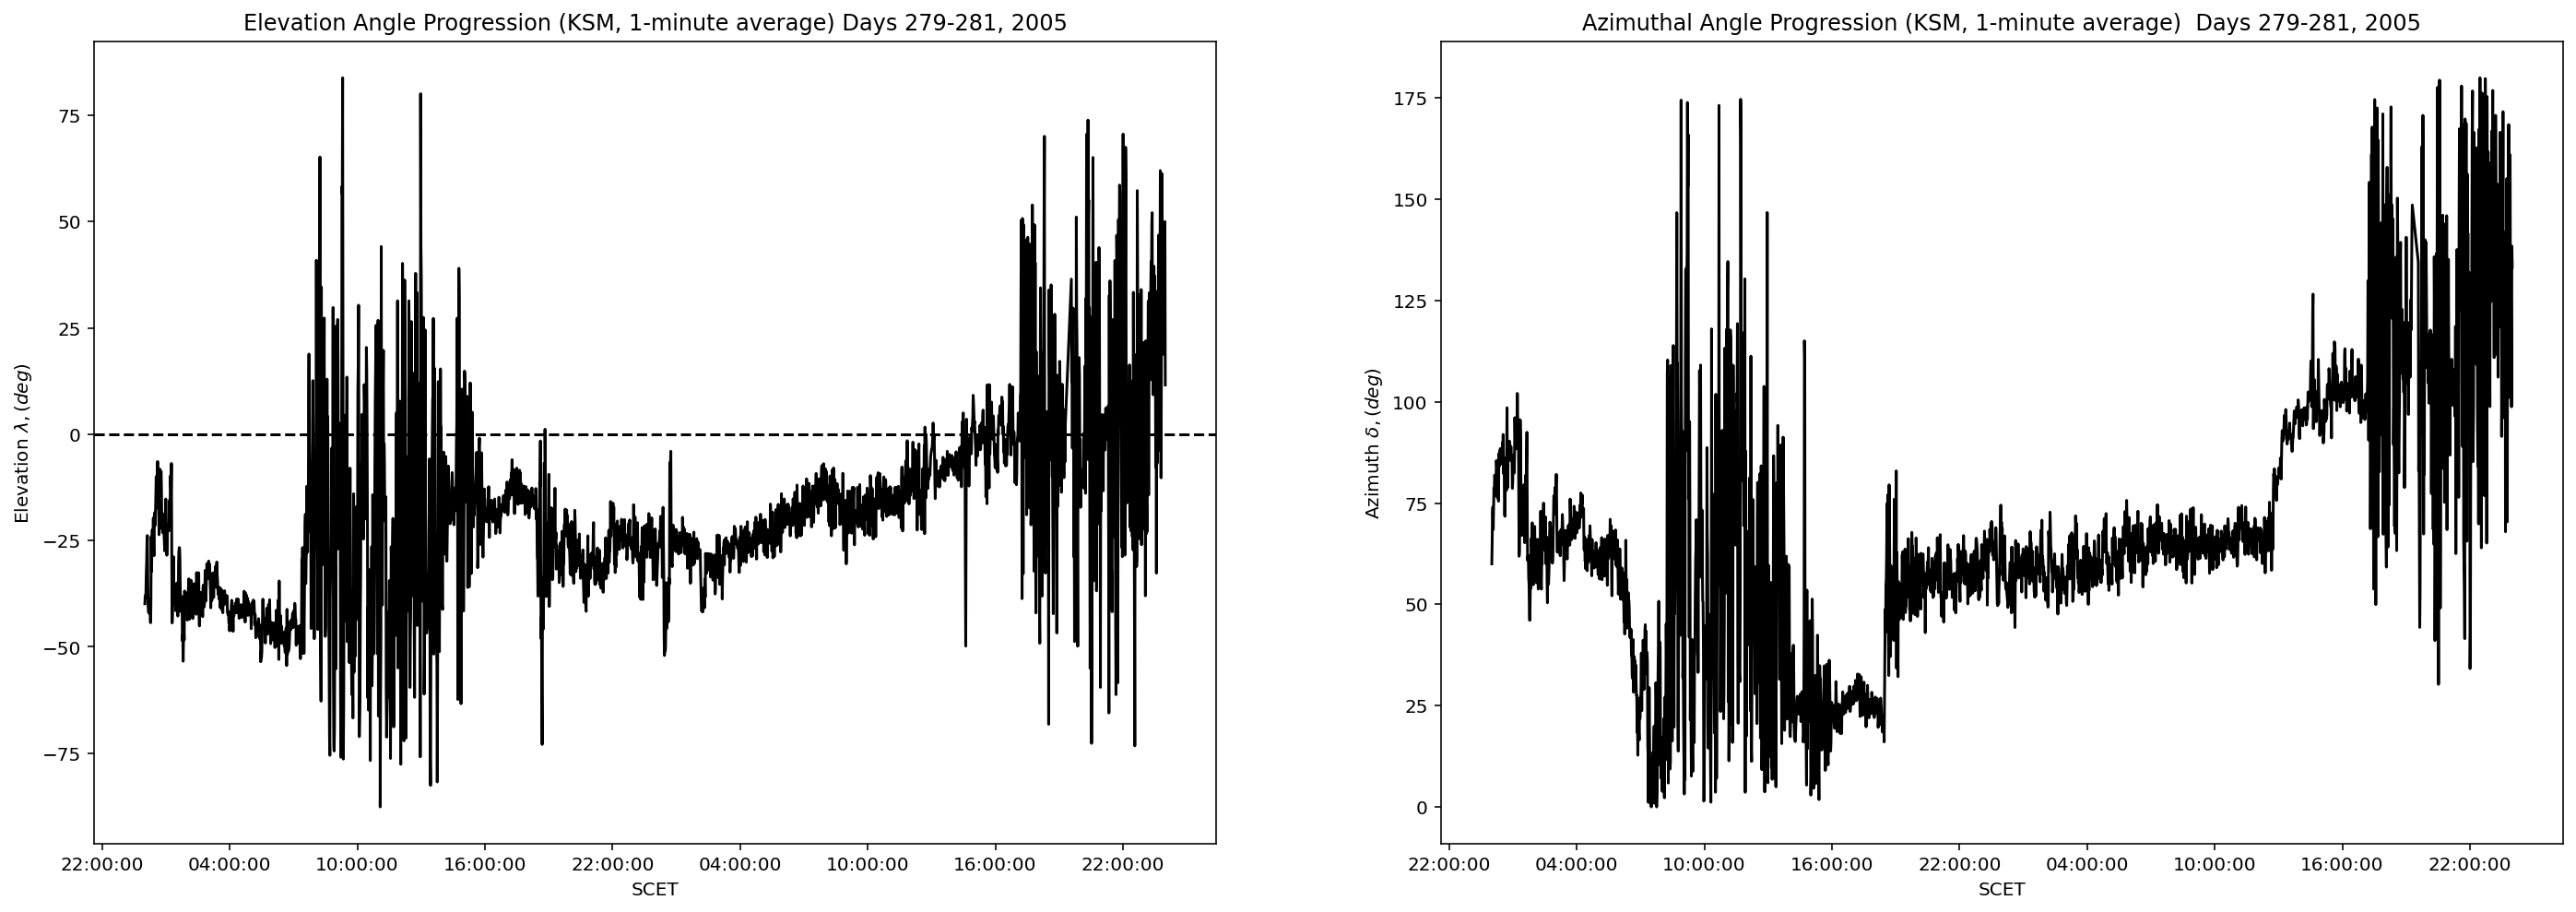

In [14]:
#retrieve data for specified days
elevation = data["Elevation"][start_index:end_index]
azimuth = data["Azimuth"][start_index:end_index]

#plot angles for the orbit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,8))

hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax[0].plot(timeframe, elevation, "black", label="$\lambda$")
ax[0].set_title("Elevation Angle Progression (KSM, 1-minute average) Days %s-%s, %s"%(str(start_day), str(end_day), str(year)))
ax[0].set_xlabel('SCET')
ax[0].set_ylabel(r'Elevation $ \lambda, \left(deg\right)$')
ax[0].axhline(0, color= "black", ls="--")
ax[0].xaxis.set_major_locator(hours)
ax[0].xaxis.set_major_formatter(h_fmt)

ax[1].plot(timeframe, azimuth, "black", label="$\delta$")
ax[1].set_title("Azimuthal Angle Progression (KSM, 1-minute average)  Days %s-%s, %s"%(str(start_day), str(end_day), str(year)))
ax[1].set_xlabel('SCET')
ax[1].set_ylabel(r'Azimuth $\delta, \left(deg\right)$')
ax[1].xaxis.set_major_locator(hours)
ax[1].xaxis.set_major_formatter(h_fmt)

In [15]:
def plot_KSM(data, year, start_day, end_day, xFormat = "Hour"):
    """This function plots the Elevation, Azimuth and Total B_Field for a specified orbit """

    #calculate start and end dates as well as their indices
    first_day = datetime(int(year), 1, 1)
    start_date = pd.Timestamp(first_day + timedelta(start_day-1, 30))
    end_date = pd.Timestamp(first_day + timedelta(end_day-1, 30))

    #use the nearest available start and end dates if they are not in data
    try:
        start_index = list(data.index).index(start_date)
        end_index = list(data.index).index(end_date)
        print("Start Date: ",start_date)
        print("End Date: ",end_date)

    except ValueError:
        start_index = data.index.get_loc(start_date, method="nearest")
        end_index = data.index.get_loc(end_date, method="nearest")
        print("Start Date: ",data.index[start_index])
        print("End Date: ",data.index[end_index])

    #retrieve data for specified days for B_tot, Elevation, and Azimuth
    timeframe = data.index[start_index:end_index]
    B_tot = data["Btotal"][start_index:end_index]
    elevation = data["Elevation"][start_index:end_index]
    azimuth = data["Azimuth"][start_index:end_index]

    #format dates for x-axis in plot
    if xFormat == "Hour":
        xlocator = mdates.HourLocator(interval = 5)
        x_fmt = mdates.DateFormatter('%H:%M:%S')
    elif xFormat == "Day": 
        xlocator = mdates.DayLocator(interval = 1)
        x_fmt = mdates.DateFormatter("%m/%d")

    gs = gridspec.GridSpec(nrows=3, ncols=1)
#    figsize=(10,15)
    ax1 = plt.subplot(gs[0])
    ax1.set_title("Cassini FGM Data (KSM, 1-minute average) Days %s-%s, %s"%(str(start_day), str(end_day), year))
    ax1.plot(timeframe, elevation, "black", label="$\lambda$")
    ax1.set_ylabel(r'Elevation $ \lambda, \left(deg\right)$')
    ax1.axhline(0, color= "black", ls="--")

    ax2 = plt.subplot(gs[1],sharex=ax1)
    ax2.plot(timeframe, azimuth, "black", label="$\delta$")
    ax2.set_ylabel(r'Azimuth $\delta, \left(deg\right)$')

    ax3 = plt.subplot(gs[2],sharex=ax1)
    ax3.plot(timeframe, B_tot,'black',label="$Total B-Field $")
    ax3.set_ylabel(r'$Total B-Field \left(nT\right)$')
    ax3.xaxis.set_major_locator(xlocator)
    ax3.xaxis.set_major_formatter(x_fmt)
    ax3.set_xlabel('SCET')


Start Date:  2005-10-06 00:00:30
End Date:  2005-10-08 00:00:30


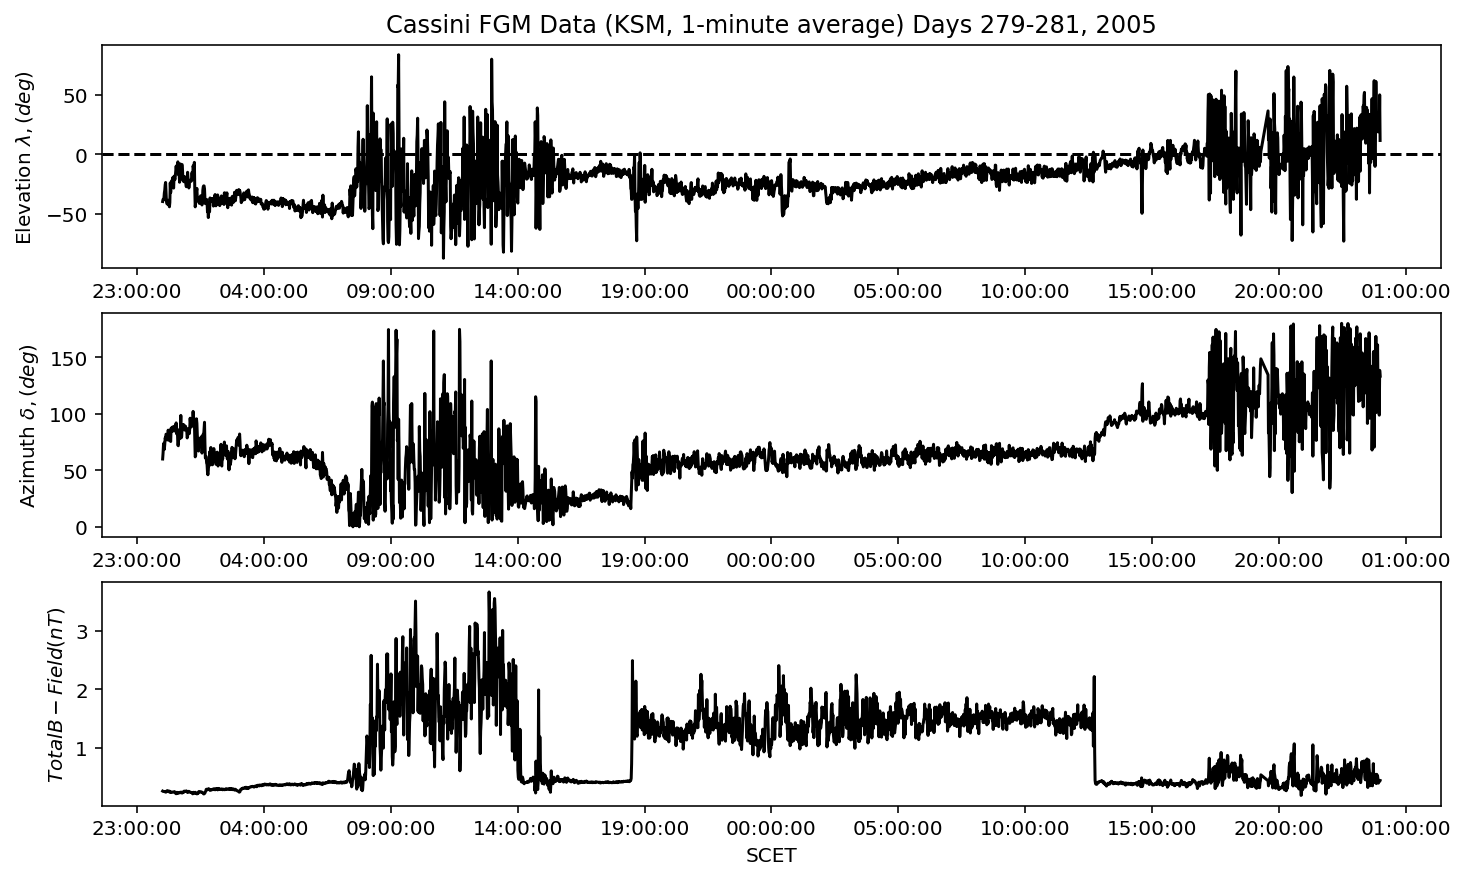

In [16]:
#define start and end days
year = 2005
start_day = 279
end_day = 281

#plot all three features in a single plot
plot_KSM(data, year, start_day, end_day)
#plt.savefig("plotted_data.png")

#### Make Sure Elevation and Azimuthal Angles are Correctly Calculated by Plotting the Data for Days 179-180, 2004

In [17]:
#define a function that fills the data and makes the time column the index of the data frame
def fill_data(data): 
    """Add columns for Rs=(x**2 + y**2)**0.5 and the elevation and azimuthal angles."""
    #Set the index as the 'Time' column
    data["Time"] = pd.to_datetime(data["Time"], format='%Y/%m/%d %H:%M:%S')
    data = data.set_index("Time")

    #add columns
    y = data["Y"]
    z = data["Z"]
    data['Rs'] = ((z*z)+(y*y))**0.5
    data["Elevation"] = np.degrees(np.arctan(data["BZ"]/(data["BX"]**2 + data["BY"]**2)**0.5))
    data["Azimuth"] = np.degrees(np.arccos(-data["BX"]/(data["BX"]**2 + data["BY"]**2)**0.5))

    return data

In [18]:
#get data for 2004
data_2004 = get_data(2004)

In [19]:
#add columns for Rs, lambda and azimuth
data_2004 = fill_data(data_2004)

Start Date:  2004-06-27 00:00:30
End Date:  2004-06-29 00:00:30


Start Date:  2004-07-12 22:35:30
End Date:  2004-07-14 00:00:30


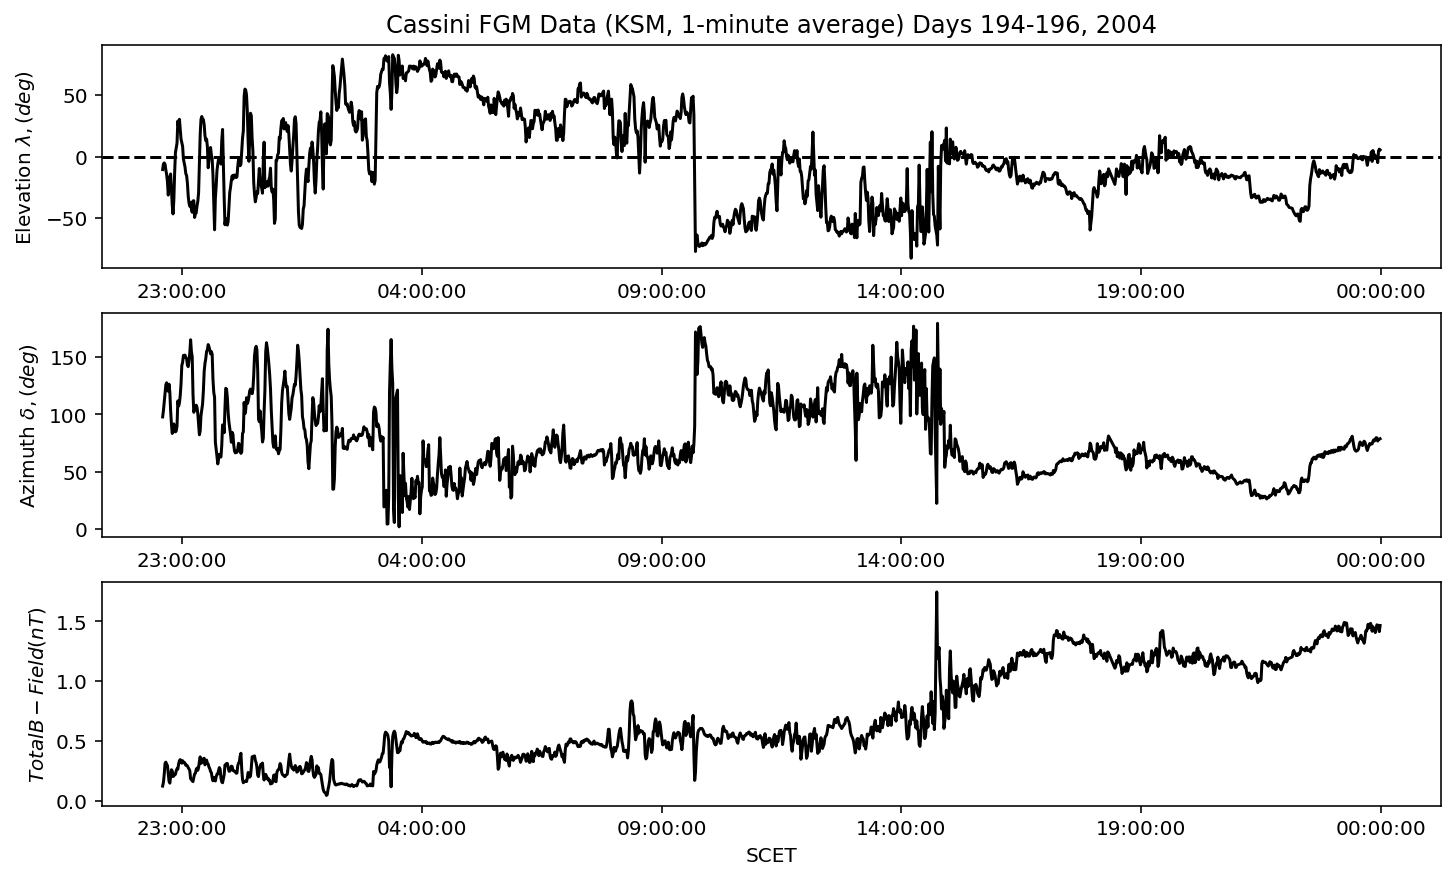

In [20]:
#define start and end days
year = 2004
start_day = 179
end_day = 181

#plot all three features for the specified days
plot_KSM(data_2004, year, start_day, end_day) #Figure 2 on Achilleos et al.
plot_KSM(data_2004, year, 194, 196) #Figure 3 on Achilleos et al.


### Notes: 

The plot corresponding to Figure 3 on Achilleos et al. shows how there is no data available for the exact specified dates (Days 194-196) and it has to find the nearest available date, which ends up being from 2004-07-12 22:35:30 until 2004-07-14 00:00:30. 

In [21]:
def get_day_data(daymin, daymax, year):
    """Returns a sample of the data for a given day range and year"""
    global get_data, fill_data

    yeardata = get_data(year)
    yeardata = fill_data(yeardata)
    start_date = pd.Timestamp(datetime(int(year), 1, 1) + timedelta(daymin-1, 30))
    end_date = pd.Timestamp(datetime(int(year), 1, 1) + timedelta(daymax-1, 30))
    start_index = yeardata.index.get_loc(start_date, method="nearest")
    end_index = yeardata.index.get_loc(end_date, method="nearest")
    print("Sample start date: ",yeardata.index[start_index],"\nSample end date:",yeardata.index[end_index])
    yeardata = yeardata[start_index:end_index]

    return yeardata

def crossings_graph(daymin, daymax, year):
    """Plots the bow shock and magnetopause crossings."""
    global get_day_data

    #retrieve data for specified day range
    tempdata = get_day_data(daymin, daymax, year)
    circledata = tempdata[::1440] #data points to use in plot to give a sense of the movement of the satellite

    #days appearing in circledata to annotate in plot
    days_annotation = [str(i+1) for i in list((circledata.index - datetime(year,1,1)).days)] #create list of strings with days

    #plot crossings
    fig, ax = plt.subplots(figsize=(8,12))
    ax.plot(tempdata['X'], tempdata['Rs'], color="black")
    ax.plot(circledata['X'], circledata['Rs'],"o", color="black")
    ax.plot(0, 0,'o',markersize=15, linewidth=30, mfc='none', color="black")

    ax.invert_yaxis()
    #annotate days in plot
    for i, day in enumerate(days_annotation):
        ax.annotate(day, (circledata['X'][i], circledata['Rs'][i]))
    ax.annotate("S", (0,0),xytext=(5,5),textcoords='offset points')

    ax.set_xlabel(r"$X_{KSM}  \left(R_s\right)$")
    ax.set_ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$")
    ax.set_title("Bow Shock and Magnetopause Crossings\n During the SOI Orbit Projected into Cylindrical KSM Coordinates, Days %s-%s, %s"%(str(daymin), str(daymax), str(year)));

Sample start date:  2004-06-26 00:00:30 
Sample end date: 2004-07-14 00:00:30


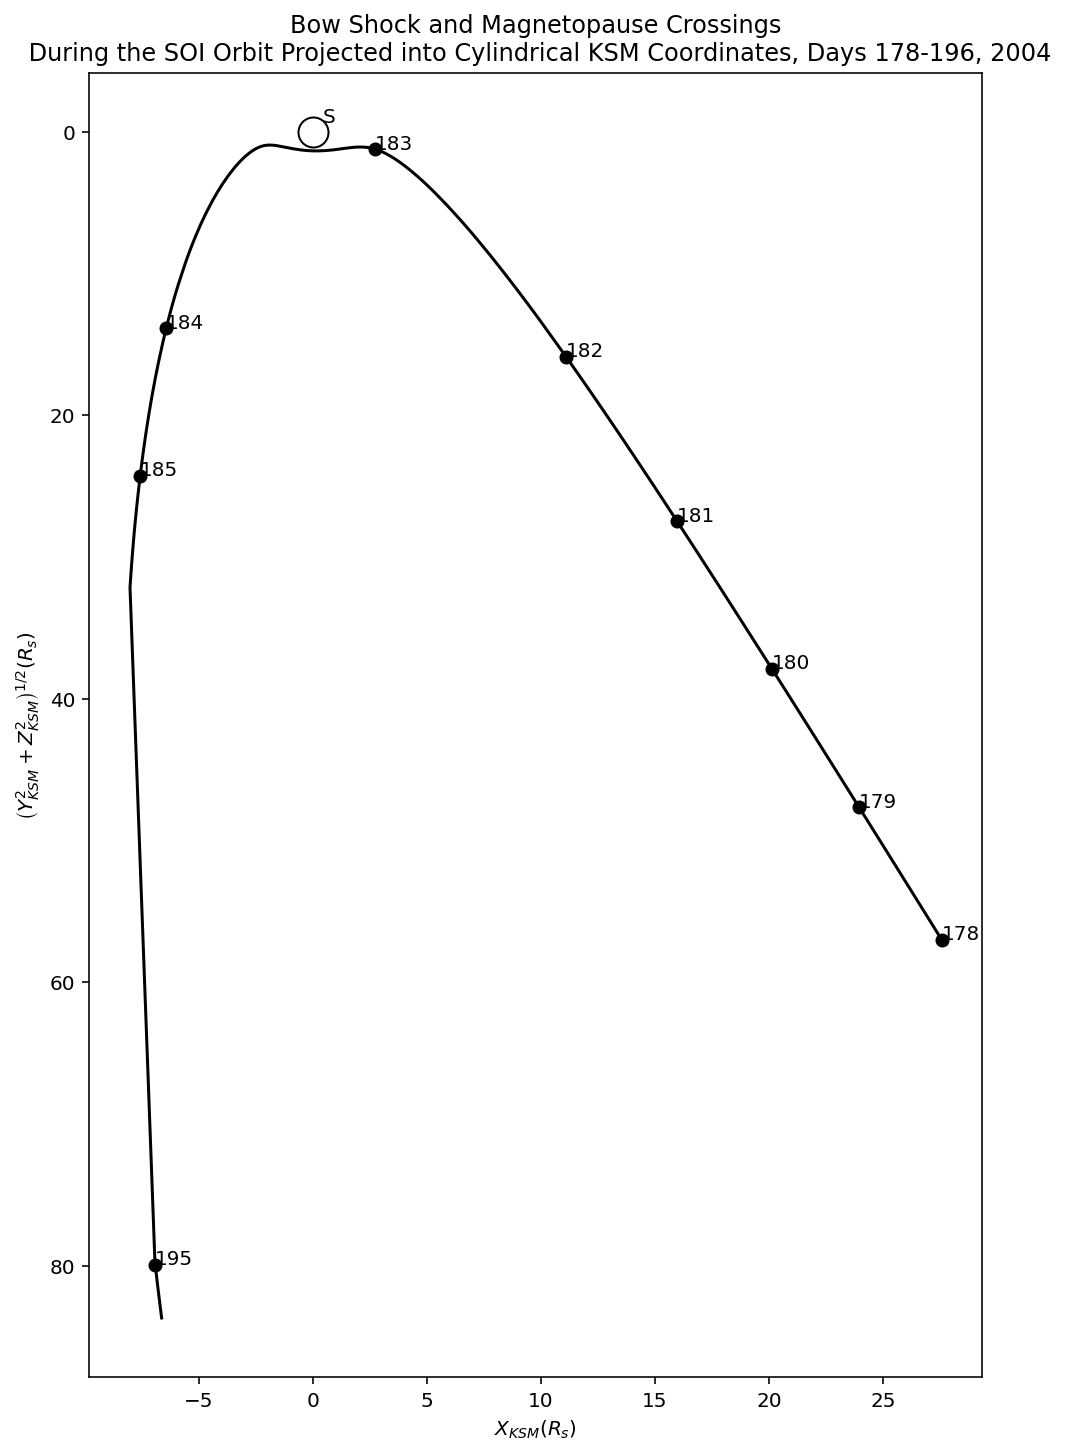

In [22]:
#define plot parameters
start = 178
end = 196
year = 2004

crossings_graph(start, end, year) #Figure 5 on Achileos et al.

### Defining Function to Identify Bow Shock Crossings (METHOD #1):
A bow shock crossing can be distinguished in a plot of the total field against time as a sudden change (i.e "step") in the field. Given this feature, we can create a function that retrieves the times that Cassini crosses Saturn's bow shock. To do this, we will look at a running window of time steps (of size `windowsize`) and calculate the gradient formed by its data-points. If the gradient is above an appropriate threshold (or simply great enough to stand out) that would indicate a step in the field data, we can infer that the spacecraft is crossing Saturn's Bow Shock.

In [23]:
#define start and end days
year = 2005
start_day = 279
end_day = 281

day_data_2005 = get_day_data(start_day, end_day, year)

print("Shape of VHM Data between Days 279 and 281 of 2005: ",np.shape(day_data_2005))

Sample start date:  2005-10-06 00:00:30 
Sample end date: 2005-10-08 00:00:30
Shape of VHM Data between Days 279 and 281 of 2005:  (2853, 12)


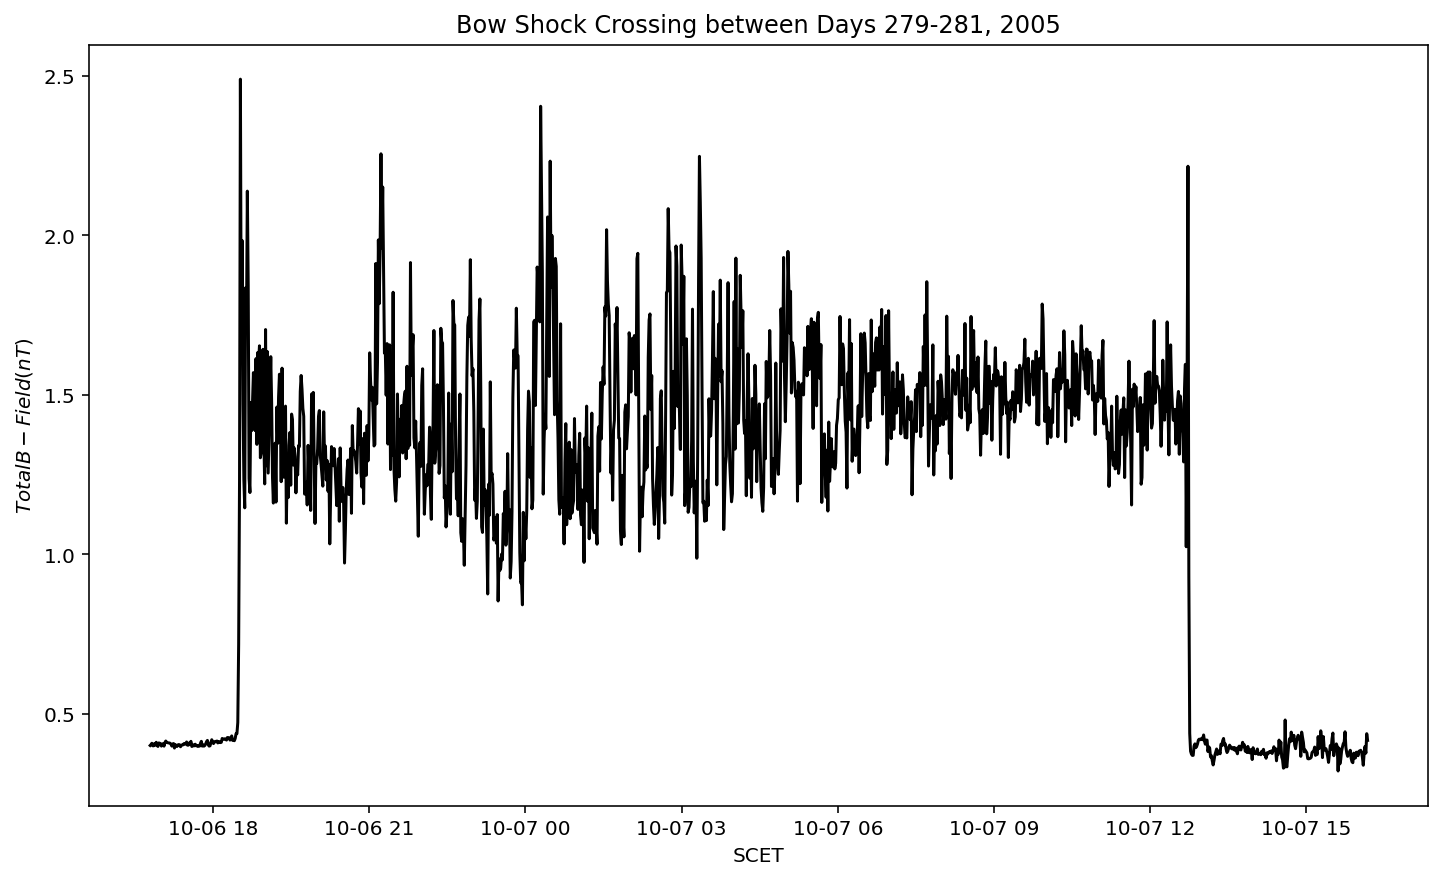

In [24]:
range_ = 1400 #minutes
crossing = day_data_2005["Btotal"][1000: 1000 + range_]

plt.figure()
plt.plot(crossing, color="black")
plt.title("Bow Shock Crossing between Days %s-%s, %s"%(str(start_day), str(end_day), year))
plt.xlabel("SCET")
plt.ylabel(r'$Total B-Field \left(nT\right)$');

### Discussion:

From the plot seen above, we can infer that the approximate window size that must be used in order to extract an appropriate gradient that will be used to determine the bow shock crossing times is of more or less 6-10 minutes. We reason this by looking at the timeframe of the crossing; with it lasting no more than $5$ minutes, I believe that using a window size of 6-10 minutes will allow for the running window to determine the exact times of the crossings. 

Dates of 'found' crossings: 
 DatetimeIndex(['2005-10-06 18:26:30', '2005-10-07 00:17:30',
               '2005-10-07 03:15:30', '2005-10-07 12:41:30'],
              dtype='datetime64[ns]', name='Time', freq=None)


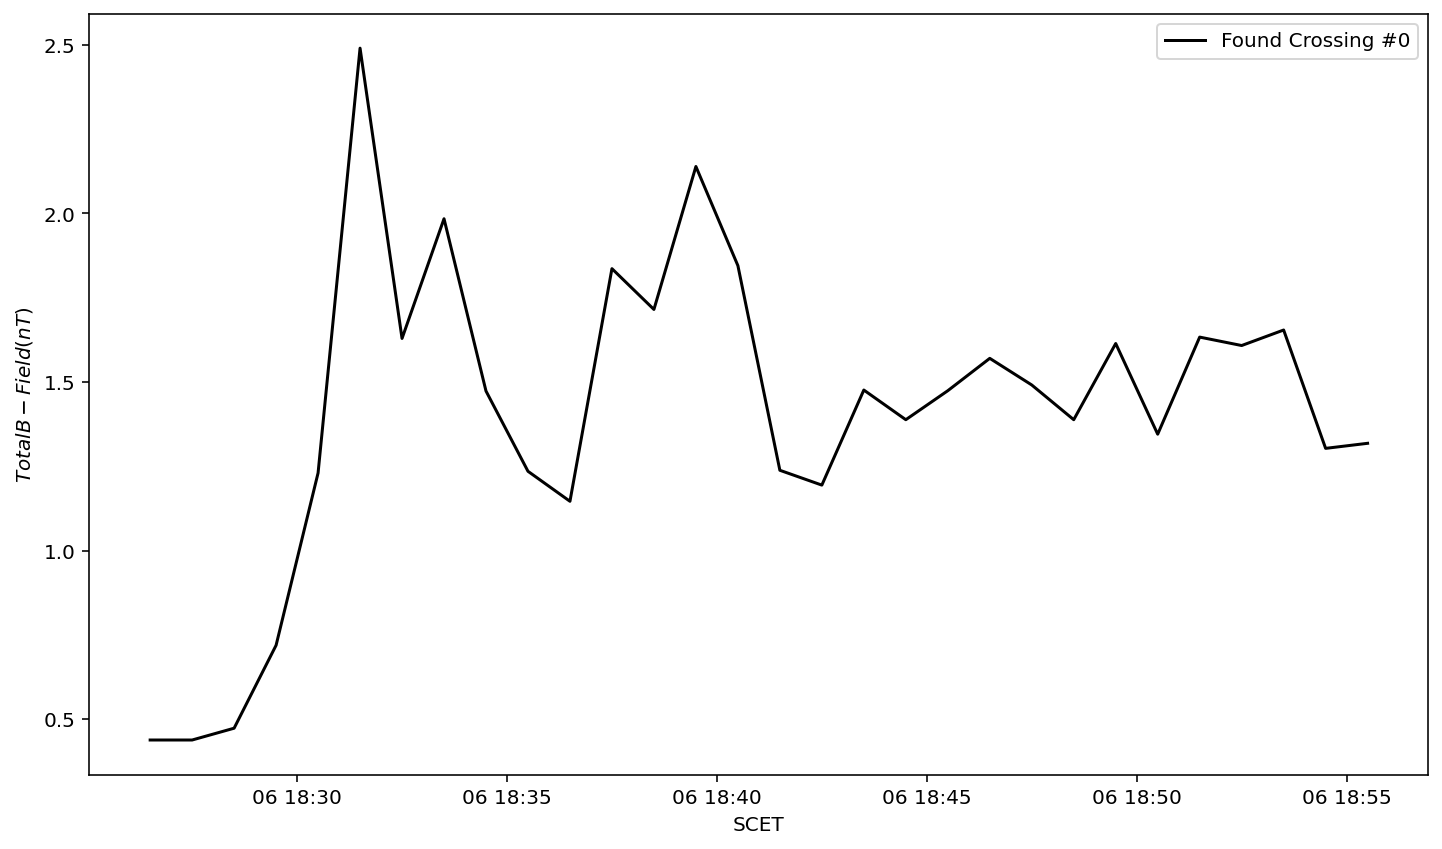

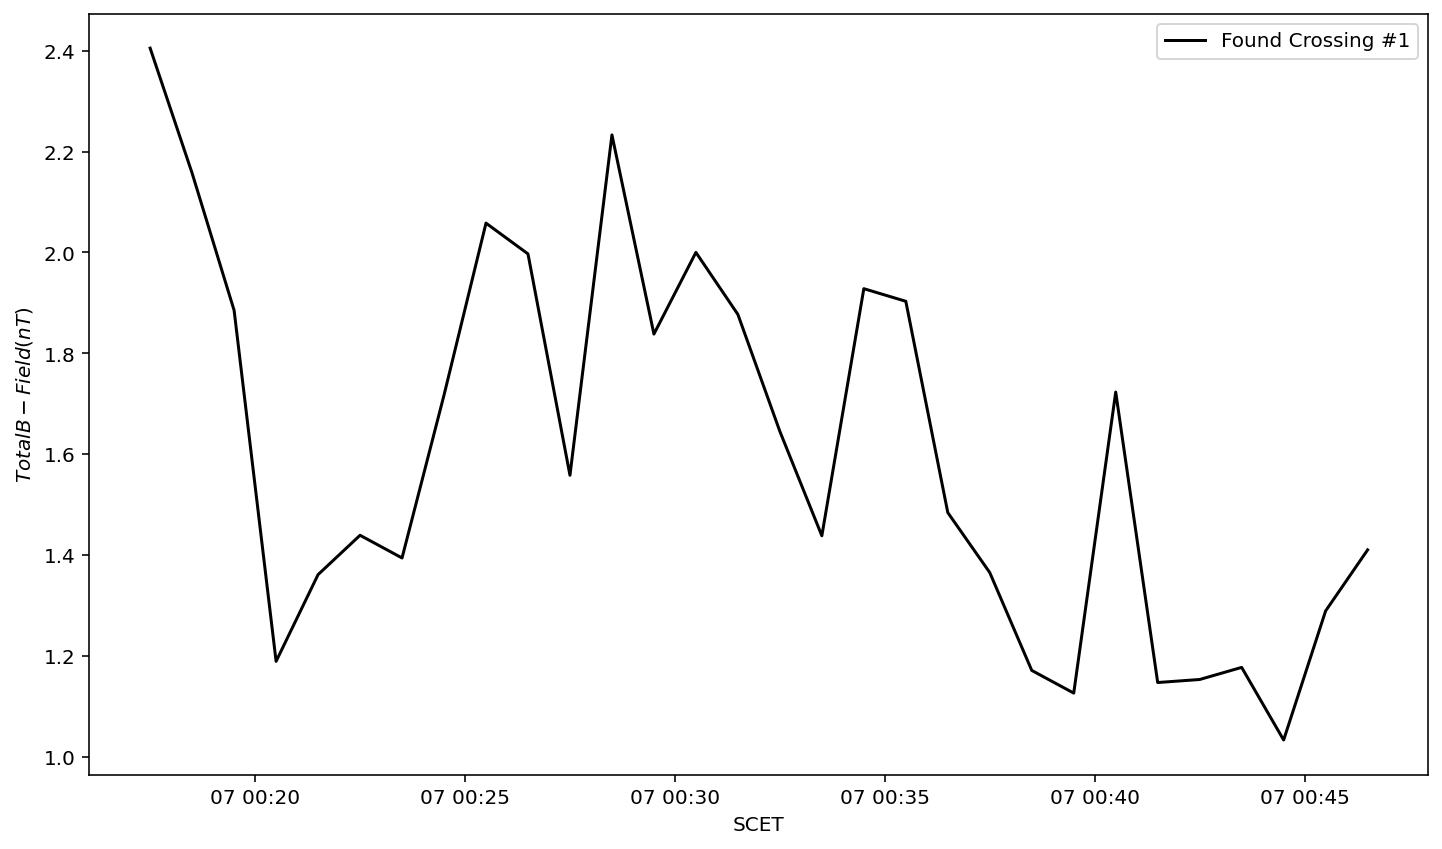

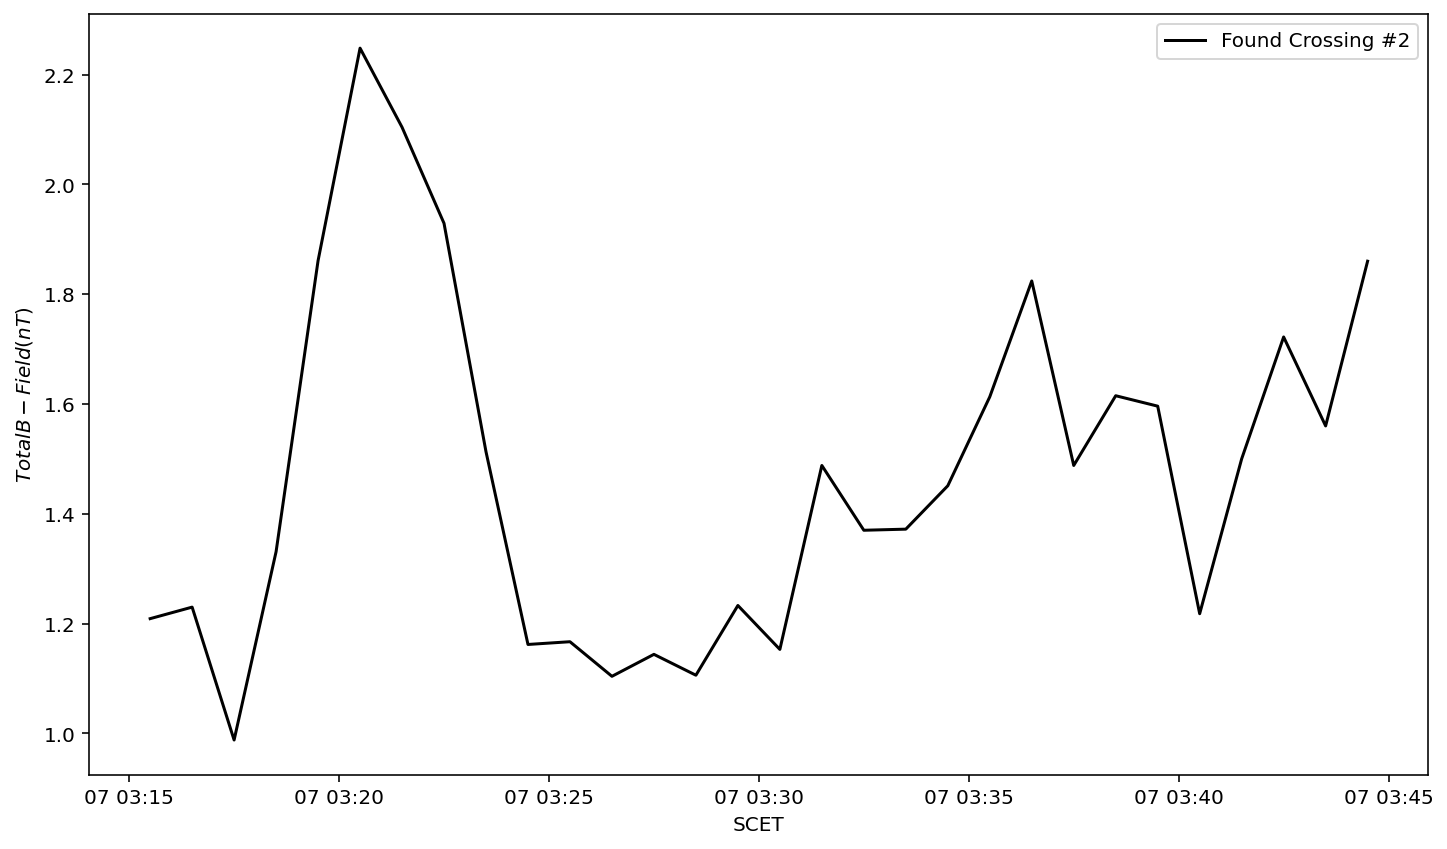

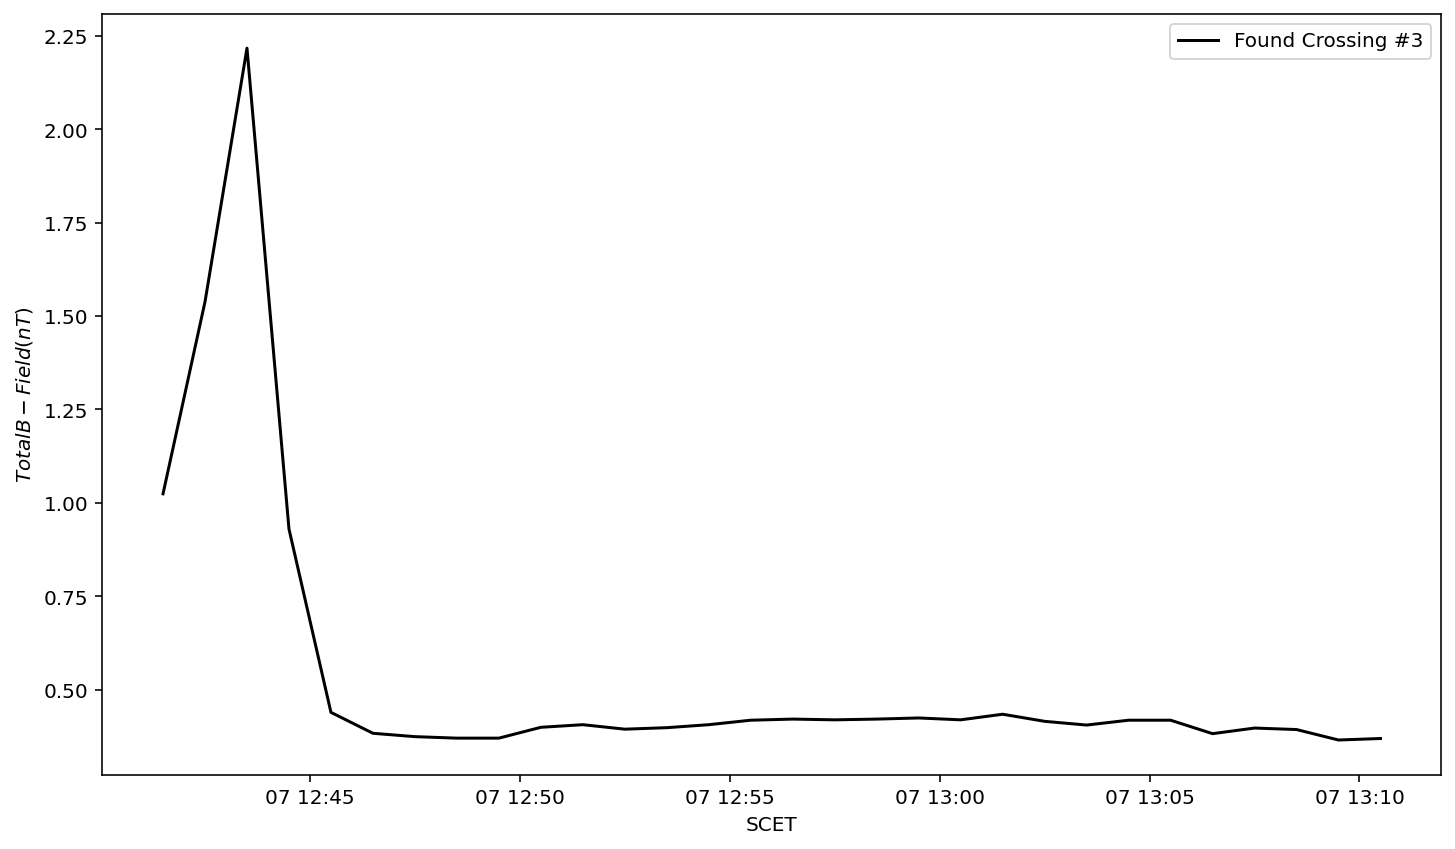

In [25]:
#calculate gradients within crossing data
gradient_list = []
std_list = []

degree = 1 #degree of polynomial fit

windowsize = 6 #windowsize
timesteps = np.linspace(1, windowsize, windowsize) #define arbitrary timesteps

numCrossings = 2 #estimated number of apparent crossings

#iterate over timeframe specified within data
for i in range(np.shape(crossing)[0]-windowsize):
    window = crossing[i:i+windowsize] #get window of data for B_tot
    std = np.std(window)
    std_list.append(std)
    grad = np.polyfit(timesteps, window, degree)[0] #calculate gradient
    gradient_list.append(abs(grad))

#retrieve indices for top unconsecutive gradients
ind = np.sort(np.argpartition(gradient_list, -(numCrossings*windowsize))[-(numCrossings*windowsize):])
#remove indices that are within windowsize of each other
ind = np.delete(ind, np.argwhere(np.ediff1d(ind) <= windowsize) + 1)

print("Dates of 'found' crossings: \n",crossing.index[ind])

range_ = 30 #minutes for plots

found_crossings = [crossing[ind[i]: ind[i] + range_] for i in range(len(ind))]
for i in range(len(ind)):
    plt.figure()
    plt.plot(found_crossings[i], color="black", label="Found Crossing #%i"%i)
    plt.legend()
    plt.ylabel(r'$Total B-Field \left(nT\right)$')
    plt.ylabel(r'$Total B-Field \left(nT\right)$')
    plt.xlabel("SCET")
    plt.xlabel("SCET");

In [26]:
print("Gradients of crossings found: \n", [gradient_list[i] for i in ind])
print("Standard deviations of data-points in crossings found: \n", [std_list[i] for i in ind])

Gradients of crossings found: 
 [0.3680571428571428, 0.22611428571428568, 0.21231428571428565, 0.2225428571428571]
Standard deviations of data-points in crossings found: 
 [0.7364200944811023, 0.4425267098027969, 0.43496414283887314, 0.6356657271449097]


### Discussion:

As can be seen, we have managed to identify the bow shock crossings for the timeframe specified, but two other dates where only noise is apparent have managed to slip through as well. This definitely poses a challenge, since after an apparent crossing the noise in the total magnetic field is a lot more substantial, making gradients for a `windowsize` of data-points prone to be much larger. I am not sure if it is worth dedicating a lot of time to solving this issue, since the apparent crossings are indeed found and by inspection one can later disregard the dates that seem to be just noise. I was trying to see if the gradients for the actual crossings are much larger than the gradients on dates with just noise to see if I could add a threshold in the code to disregard these, but they don't seem to deviate by much at first glance (see printed values above, with the first and last gradients corresponding to actual bow shock crossings).

I also found that there is a payoff in the windowsize used, since using a low windowsize really emphasises the apparent crossings, but also makes the noise fluctuations much more prone to slip through to the found crossings, while using a larger windowsizes makes the latter effect less important but also makes the apparent crossings have a lower gradient.


In [27]:
def identify_crossings_1(data, windowsize, estimatedNumCrossings):
    """Retrieve times where Cassini crosses Saturn's bow shock on a prolonged basisin data that is
    restricted to a specified timeframe."""

    degree = 1 #degree of polynomial fit
    timesteps = np.linspace(1, windowsize, windowsize) #
define arbitrary timesteps

    gradient_list = []
    std_list = []

    #iterate over timeframe specified within data
    for i in range(np.shape(data)[0]-windowsize):
        window = data["Btotal"][i:i+windowsize] #get window of data for B_tot
        grad = np.polyfit(timesteps, window, degree)[0] #calculate gradient
        std = np.std(window)
        gradient_list.append(abs(grad))
        std_list.append(std)

    #retrieve indices for top unconsecutive gradients
    ind = np.sort(np.argpartition(gradient_list, -(estimatedNumCrossings*windowsize))[-(estimatedNumCrossings*windowsize):])
    #remove indices that are within windowsize of each other
    ind = np.delete(ind, np.argwhere(np.ediff1d(ind) <= windowsize) + 1)

    ind_std = np.sort(np.argpartition(std_list, -estimatedNumCrossings*windowsize)[-estimatedNumCrossings*windowsize:])
    #remove indices that are within windowsize of each other
    ind_std = np.delete(ind_std, np.argwhere(np.ediff1d(ind_std) <= windowsize) + 1)
    #crossing times found
    crossing_times = data.index[ind_std]

    ksmcoords = []
    for i in range(len(crossing_times)):
        ksm = data.loc[str(crossing_times[i])]
        ksm = ksm.values.tolist()
        ksmcoords.append([ksm[4], ksm[5], ksm[5]])

    return ind_std,crossing_times, ksmcoords

SyntaxError: invalid syntax (<ipython-input-27-9987820ca46c>, line 7)

### METHOD #2:

Alternatively, we can determine the bow shock crossings by first smoothing out the data to consequently identify peaks in the field gradient progression with less significant fluctuations. We smooth the field data out using `scipy.signal.savgol_filter` and then use `scipy.signal.find_peaks` to identify the peaks (i.e bow shock crossing points). 

In [43]:
def smoothdata(data,windowsize,polyorder):
    """Returns a smoothed out form of the data"""

    return signal.savgol_filter(data,windowsize,polyorder)

def identify_crossings_2(orbit_data, windowsize, estimatedNumCrossings, polyorder=3, edge_ord=2, crossing_interval=200):
    """Retrieve times where Cassini crosses Saturn's bow shock on a prolonged basisin data that is
    restricted to a specified timeframe."""
    #global start_day, end_day, year
    orbit_m=ndimage.median_filter(orbit_data['Btotal'], size=40) #apply median filter to data

    dif3 = np.gradient(smoothdata(orbit_m, windowsize, polyorder), 0.01, edge_order=edge_ord)

    h = np.quantile(dif3,1-(2*(estimatedNumCrossings+1)/len(dif3)))

    #find entries and exits
    entry,_ = find_peaks(dif3,height=h,distance=crossing_interval)
    exit,_ = find_peaks(-dif3,height=h,distance=crossing_interval)


    #plot on axes 
    fig, ax = plt.subplots()
    ax.plot(orbit_data["Btotal"],c='k')

    ax.set_title("Bow Shock Crossings between Days %s-%s, %s"%(str(start_day), str(end_day), year))
    ax.set_xlabel("SCET")
    ax.set_ylabel(r'$Total B-Field \left(nT\right)$');
    ax.plot(orbit_data.index[entry],orbit_data['Btotal'][entry] ,'x',color= "b",label='entry',markersize=12,linewidth=0)
    ax.plot(orbit_data.index[exit], orbit_data['Btotal'][exit] ,'x',color= "r",label='exit',markersize=12,linewidth=0)
    ax.legend()
    plt.savefig("crossings_ex.png")

    #ax.plot(entry,dif3[entry],'x',c='k')
    #ax.plot(exit,dif3[exit],'x',c='r');

    #extract entry and exit times
    entries = orbit_data.index[entry]
    exits = orbit_data.index[exit]

    cross_times=[]

    for i in range(len(entries)):
        entry = str(entries[i].strftime('%Y-%m-%d %H:%M:%S'))
        exit = str(exits[i].strftime('%Y-%m-%d %H:%M:%S'))
        cross_times.append(entry)
        cross_times.append(exit)

    ksmcoords = []

    for i in range(len(cross_times)):
        ksm = orbit_data.loc[cross_times[i]]
        ksm = ksm.values.tolist()
        ksmcoords.append([ksm[4], ksm[5], ksm[6]])


    return entries, exits, ax, ksmcoords


In [0]:
#TEST
windowsize = 7
estimatedNumCrossings = 3

entries, exits, ax, ksmcoords_2= identify_crossings_2(day_data_2005, windowsize, estimatedNumCrossings) #method 2

print('KSM Coordinates of the crossing points',ksmcoords_2)
print("Estimated Entry Dates for Days 279-281, 2005: \n",entries)
print("Estimated Exit Dates for Days 279-281, 2005: \n",exits)

In [0]:
ind, crossing_times, ksmcoords_1 = identify_crossings_1(day_data_2005, windowsize, estimatedNumCrossings) #method 1

plt.figure()
plt.plot(day_data_2005['Btotal'], color="black")
plt.title("Bow Shock Crossing between Days %s-%s, %s"%(str(start_day), str(end_day), str(year)))
plt.plot(day_data_2005.index[ind],day_data_2005['Btotal'][ind],marker='x',c='r',markersize=12,linewidth=0,label='Crossing points')
plt.xlabel("SCET")
plt.legend()
plt.ylabel(r'$Total B-Field \left(nT\right)$');

print("Estimated Crossing Dates for Days 279-281, 2005: \n", crossing_times)

## Discussion:

From the plots shown above, it seems as though the second method to determine the bow shock crossing points is more accurate. Therefore, we will use this method to continue our analysis.

### Other Date Intervals that Look Good for Analysis:

Playing around with `identify_crossings_2` and with `plot_KSM` allows us to inspect the data for date intervals in other years. As of now, I've found that the following dates seems interesting for inspection and analysis:

- Days 279-281, 2012 (windowsize=7, estimatedNumCrossings=11) (good)

- Days 221-223, 2005 (windowsize=7, estimatedNumCrossings=2) (good)

- Days 253-255, 2005 (windowsize=7, estimatedNumCrossings=3) (average)

- Days 273-275, 2005 (windowsize=7, estimatedNumCrossings=6) (very good)

### Using _Masters et al: Empirical Model of Saturn's Bow Shock_ to create our own empirical model

The following functions do the following:

-> `calc_theta(coordinates)` = Calculates the values of r and cos(theta) given a coordinate

-> `calc_L(coordinates)` = Calculates the values of r and cos(theta) for given coordinates. Then uses the following equation $L=R(\epsilon cos(\theta))$     (3.0) with an uncertainty of $L=R(\delta \epsilon cos(\theta))$       (3.1) and returns this in a n dimentional array  with the first value corresponding to the L values and second corresponding to the uncertainty in L values.

-> `SolarWind(L)` = Calculates the values of dynamic pressure using the following equation $e^{-4.2ln(\frac{200L}{5043})}$ (4) and associated uncertainty: $e^{-4.2ln(\frac{200\delta L}{5043})}$ (4.1). Producing a n dimensional array with the first value corresponding to the dynamic pressure associated for each L and second corresponding to the uncertainty in those pressure values.

In [0]:
def calc_theta(coordinates):
    """Calculates the values of r and cos(theta) given a coordinate."""
    coordinates = np.array(coordinates)
    #calculate r
    r = np.sqrt(np.sum(np.square(coordinates), axis=1))

    #using trigonometry calculate cos(theta)
    cos_theta = (coordinates[:,0])/r

    return cos_theta, r

def calc_L(coordinates):
    """Calculates the values of r and cos(theta) for given coordinates. Then uses the following equation $L=R(\epsilon cos(\theta))$    
    (3.0) with an uncertainty of $L=R(\delta \epsilon cos(\theta))$ (3.1) and returns this in a n dimentional array  with the first value               corresponding to the L values and second corresponding to the uncertainty in L values."""
    #obtain cos(theta) and r
    cos_theta, r = calc_theta(coordinates)

    #Master's model - equations (3.0/3.1)
    epsilon = 1.05
    unc_epsilon = 0.09
    L = np.array(r*(1+epsilon*cos_theta))
    unc_L = np.array(r*unc_epsilon*cos_theta)
    #print('L:',L)
    #print('unc_L:',unc_L)
    #join the values of L and its uncertainties 
    array_L = np.vstack((L, unc_L)).T

    return array_L

def SolarWind(L):
    """Calculates the values of dynamic pressure using the following equation $e^{-4.2ln(\frac{200L}{5043})}$ (4) and associated uncertainty:         $e^{-4.2ln(\frac{200\delta L}{5043})}$ (4.1). Producing a n dimensional array with the first value corresponding to the dynamic pressure 
    associated for each L and second corresponding to the uncertainty in those pressure values."""
    #Master's model - equation (4)
    P = np.exp(-4.2*np.log(200*L[:,0]/5043))
    unc_P = L[:,1]*(1/L[:,0])*np.exp(-4.2*np.log(200*L[:,0]/5043)) #*(-4.2)
    #print('P:',P)
    #print('unc_P:',unc_P)
    #join the values of P and its uncertainties
    array_P = np.vstack((P, unc_P)).T

    return array_P


Here we set up variables to be used using the functions defined above:

In [0]:
year = 2005
start_day = 279
end_day = 281
windowsize=7
estimatedNumCrossings = 3

entries, exits, ax, ksmcoords_2= identify_crossings_2(day_data_2005, windowsize, estimatedNumCrossings)

In [0]:
year = 2005
start_day = 101
end_day = 103
windowsize=7
estimatedNumCrossings = 10
day_data_2005 = get_day_data(start_day, end_day, year)
plot_KSM(day_data_2005, year, start_day, end_day, xFormat = "Hour")
entries, exits, ax, ksmcoords_2= identify_crossings_2(day_data_2005, windowsize, estimatedNumCrossings)

L = calc_L(ksmcoords_2) #calculate L - semilatus recutum
P = SolarWind(L) #calculate solar wind dynamic pressure

The following functions do the following features:
    
-> RSNeq(x,c1,c2) = Using the following equation $R_{SN}=c1(P_{SW})^ \frac{-1}{c2} $(5) to 

-> RMP(x0, epsilon) = calculates the magnetopause model using equation $ R_{MP} = x_0 +\frac{L}{1+\epsilon} $ (6)

In [0]:
crossingdata = np.loadtxt("crossing data.csv", delimiter=",", skiprows=1, dtype=int)
crossingdata = pd.DataFrame(data=crossingdata,columns=["year", "day","time"])
crossingdata = pd.to_datetime((crossingdata["year"]*10000000+crossingdata["day"]*10000+crossingdata["time"]), format='%Y%j%H%M') +pd.Timedelta(30,unit="S")
crossingdata2004, crossingdata2005 = crossingdata[:43], crossingdata[43:]

data2004 = get_data(2004)
data2004["Time"] = pd.to_datetime(data2004["Time"], format='%Y/%m/%d %H:%M:%S')
data2004 = data2004.set_index("Time")

data2005 = get_data(2005)
data2005["Time"] = pd.to_datetime(data2005["Time"], format='%Y/%m/%d %H:%M:%S')
data2005 = data2005.set_index("Time")

#crossingsdata = data2004.loc(crossingdata2004)#+ data2005.index.get_loc(crossingdata2005, method="nearest")

storage = []
for i in  range(len(crossingdata2004)):
    crossingdata2004[i] = str(crossingdata2004[i].strftime('%Y-%m-%d %H:%M:%S'))

for i in  range(43,206):
    crossingdata2005[i] = str(crossingdata2005[i].strftime('%Y-%m-%d %H:%M:%S'))


for i in range(len(crossingdata2004)):

    try:
        storage.append(data2004.loc[crossingdata2004[i]])#+ data2005.index.get_loc(crossingdata2005, method="nearest")
    except:
        print("missing data for:",crossingdata2004[i])


for i in range(43,206):
    try:
        storage.append(data2005.loc[crossingdata2005[i]])#+ data2005.index.get_loc(crossingdata2005, method="nearest")
    except:
        print("missing data for:",crossingdata2005[i])

X=[]
for i in range(len(storage)):
     X.append([storage[i][4], storage[i][5], storage[i][6]])
L = calc_L(X) #calculate L - semilatus recutum
P = SolarWind(L) #calculate solar wind dynamic pressure

$$R_{SN} = 12.3x^{\frac{-1}{4.3}}$$
$$\delta R_{SN} = \frac{-12.3}{4.3}x^{\frac{-5.3}{4.3}}\delta R_{SN}$$
$$R_{MP} = x_0 + \frac{1}{1+\epsilon}$$

In [0]:
def RSNeq(x):
    y = x[:,1]
    x = x[:,0]
    #eq. 5
    return 12.3*(x**(-1/4.3)), (-12.3/4.3)*(x**(-5.3/4.3))*y

plt.figure()
plt.plot(P[:,0],RSNeq(P)[0], 'k.')
plt.errorbar(P[:,0],RSNeq(P)[0], xerr=P[:,1], yerr=(RSNeq(P)[1]), ecolor = 'k', linestyle=None, fmt='.')

x_ticks = np.linspace(0, 0.1, 20)
y_ticks = np.linspace(0, 40, 20)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(which='both')


plt.yscale('log')
plt.xscale('log')
plt.title('Characterising the Solar Wind Dynamic Pressure', fontsize=15)
plt.xlabel(r"$P_{SW} (nPa)$", fontsize=15)
plt.ylabel(r'$R_{SN} (R_s $)', fontsize=15)
plt.show()

def RMP(x0, epsilon):
    #eq. 6
    return x0 + (l/(1+epsilon))

def masters(data):
    #model unadjusted equation

    eps= np.linalg.norm(KSM)/np.linalg.norm(data["X","Y","Z"].values.tolist())

    c_array =scipy.optimize.curve_fit(RSNeq,PSW,RSN)

    #figure out plasma mass density estimation from nick

    #plot for epsilon

    #plot fig 6 for c1 c2

    m, c = np.linalg.lstsq(PSW, RSN, rcond=None)[0]
    epsilon

    P_sw = []
    R_sn = []

    plt.figure()
    plt.plot(P_sw, R_sn, 'k.')
    plt.errorbar(xerr=P_err)
    y = np.linspace(min(P_sw), max(P_sw), 10000)
    plt.plot(P_sw, y, 'k-')
    plt.show()
    #adjusted equation

    #addd to the saturn plot in ksm above.

In [0]:

#print(P)
P = np.copy(J)
print(np.shape(P))

In [0]:
#print(P,RSNeq(P))
indices = []
for i in range(np.size(P[:,0])):
    if P[i][0] >0.125:
        indices.append(i)
P=np.delete(P,indices,0)
#P = np.unique(P)

print(P[:,0])

In [0]:
#plot histogram of solar wind dynamic pressure values
plt.figure()
bins = 60
pop = np.histogram(P[:,0], bins=bins,density=True)
raw_figures = plt.hist(P[:,0],bins=bins, color = 'b', edgecolor='k', label="Distribution of $P_{SW}$",density =True)

#print(pop,P[:,0])
params = maxwell.fit(P[:,0])
#print(params)
#print(pop[1][-1])
x = np.linspace(0.001, 0.3, 100)

plt.plot(x, maxwell.pdf(x, *params), "r", lw=3, label="Maxwell Distribution Best Fit")
plt.xlabel(r"$P_{SW} (nPa)$", fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Characterising the Solar Wind Dynamic Pressure: HISTOGRAM', fontsize=13)
plt.legend()
plt.savefig("histogram.png")
plt.show()


sizeofhist = int(np.shape(pop[1])[0])-1
storage1 = np.zeros(sizeofhist)
for i in range(sizeofhist):
    storage1[i] = (pop[1][i]+pop[1][i+1])/2
print(chisquare(f_obs=pop[0],f_exp=maxwell.pdf(storage1, *params)))
print(ks_2samp(pop[0],maxwell.pdf(storage1, *params)))

In [0]:

data = maxwell.rvs(loc=0, scale=5, size=10000)

params = maxwell.fit(data, floc=0)
print(params)
# (0, 4.9808603062591041)

plt.hist(data, bins=20)
x = np.linspace(0, 25, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3)
plt.show()

In [0]:
#obtains the centre of each bin taken to be the values for the solar wind dynamic pressure
raw_bin_edges = raw_figures[1]
print(raw_bin_edges)
raw_bin_middle = []

for i in range(0,len(raw_bin_edges)-1):
    middle = (raw_bin_edges[i+1] + raw_bin_edges[i])/2
    raw_bin_middle.append(middle)

In [0]:
#obtains the height of each bin
raw_count = np.array(raw_figures[0])
print(raw_count)
print(np.sqrt(raw_count))

In [0]:
#ks test
ks_testMaxwell = stats.kstest(raw_count, 'maxwell')
ks_testPoisson = stats.kstest(raw_count, 'poisson')
print(ks_testMaxwell)
print(ks_testPoisson)

In [0]:
#chi-squared test
def chisq(obs, exp, error):
  """ Calculates the Chi-Squared value for a observed (obs) dataset, the expected (exp) values, with the error associated."""
  return np.sum((obs - exp) ** 2 / (error ** 2))

err = np.sqrt(raw_count)
print(err)

#maxwell
chi_squareMaxwell = chisq(raw_count, expectedMaxwell, err)

#poisson
chi_squarePoisson = chisq(raw_count, expectedPoisson, err)

print(chi_squareMaxwell)
print(chi_squarePoisson)

In [0]:
#print(P)
#print(RSNeq(P))

# Bow shock orientation

Here we will be estimating the vector field upstream $B_U$ and downstream $B_D$ of the bow shock in order to calculate the coplanarity normal to the shock surface. This is done by utilising the following equation:
$$ n_{CP} = \frac{(B_D - B_U)×(B_D × B_U)}{|(B_D - B_U)×(B_D × B_U)|} \tag{3}$$ 

Using the 1 minute average data identify the regions of upstream BU (solar wind) and dowstream BD (magnetosheath) field components. Then take an average of each component across the region. Then use the average for each component to calculate the expression from above.

In [28]:
def extract_B_vector(start_time, end_time, data):
    """This function extracts the B vector for the given time interval"""
    start_index =  list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(start_time)
    end_index = list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(end_time)

    B_X = data["BX"][start_index+1:end_index]
    B_Y = data["BY"][start_index+1:end_index]
    B_Z = data["BZ"][start_index+1:end_index]
    B_vector = np.array([B_X,B_Y,B_Z])

    return B_vector

In [29]:
def divide(data, num_of_intervals):
    """This function will divide the upstream/downstream intervals into subintervals"""
    sub_3vectors = []
    num_for_each_interval = len(data[0])//num_of_intervals
    for components in data:
        comp_sub = []
        for j in range(num_of_intervals):
            if j != num_of_intervals-1:
                comp_sub.append(components[j*num_for_each_interval:(j+1)*num_for_each_interval])
            else:
                comp_sub.append(components[j*num_for_each_interval:])
        sub_3vectors.append(comp_sub)
    return sub_3vectors

In [30]:
def average_B(data):
    """This function calculates the average upstream and downstream magnetic field vectors for each subinterval.
    Our data is in the format of[[BX1, BX2, ...],[BY1, BY2, ...],[BZ1, BZ2, ...]] and we want to output is [[averageBX1, ..., average BX8],[averageBY1, ..., average BY8],[averageBZ1, ..., average BZ8]]"""
    B_average = []
    for components in data:
        component = []
        for subintervals in components:
            ave_int = np.sum(subintervals)/len(subintervals)
            component.append(ave_int)
        B_average.append(component)

    return B_average

In [31]:
def nCP(BD_average,BU_average):
    """This function calculates the coplanarity normal to the shock surface using eq(3)."""
    cross_product = np.cross(np.subtract(BD_average,BU_average), np.cross(BD_average,BU_average))
    nCP = cross_product/np.linalg.norm(cross_product)
    return nCP

$$\theta_{shock angle} = 180 - \frac{180 arccos(\frac{B_{U_{average}}.n_{CP}}{|B_{U_{average}}||n_{CP}|})}{\pi}$$

In [34]:
def shock_angle(BU_average,nCP):
    """This function calculates the shock angle, which is the angle between the upstream solar wind BU, and the coplanarity normal to the shock surface nCP."""
    #The shock angle is calculated by rearranging the dot product formula a.b = |a||b|cos(theta) and calculating theta, where theta is the shock angle.
    shock_angle = 180 - np.arccos(np.dot(BU_average,nCP)/(np.linalg.norm(BU_average)*np.linalg.norm(nCP)))*180/np.pi
    return shock_angle

In [36]:
def subinterval_values(BU_div,BD_div):
    """Takes in the sub-interval values of BD and BU, then calculates the shock angle and coplanarity normal for each iteration
       The input dimension is: [[BXs][BYs][BZs]]"""
    nCP_values = []
    shock_values = []
    for i in range(len(BU_div[0])):
        for j in range(len(BU_div[0])):
            BU_data = np.array([BU_div[0][i], BU_div[1][i], BU_div[2][i]])
            BD_data = np.array([BD_div[0][j], BD_div[1][j], BD_div[2][j]])

            nCP_values.append(nCP(BD_data,BU_data))
            shock_values.append(shock_angle(BU_data,nCP_values[-1]))
    return nCP_values, shock_values

Sample start date:  2004-06-27 00:00:30 
Sample end date: 2004-06-28 04:48:30


(12596.76701388889, 12596.833680555555)

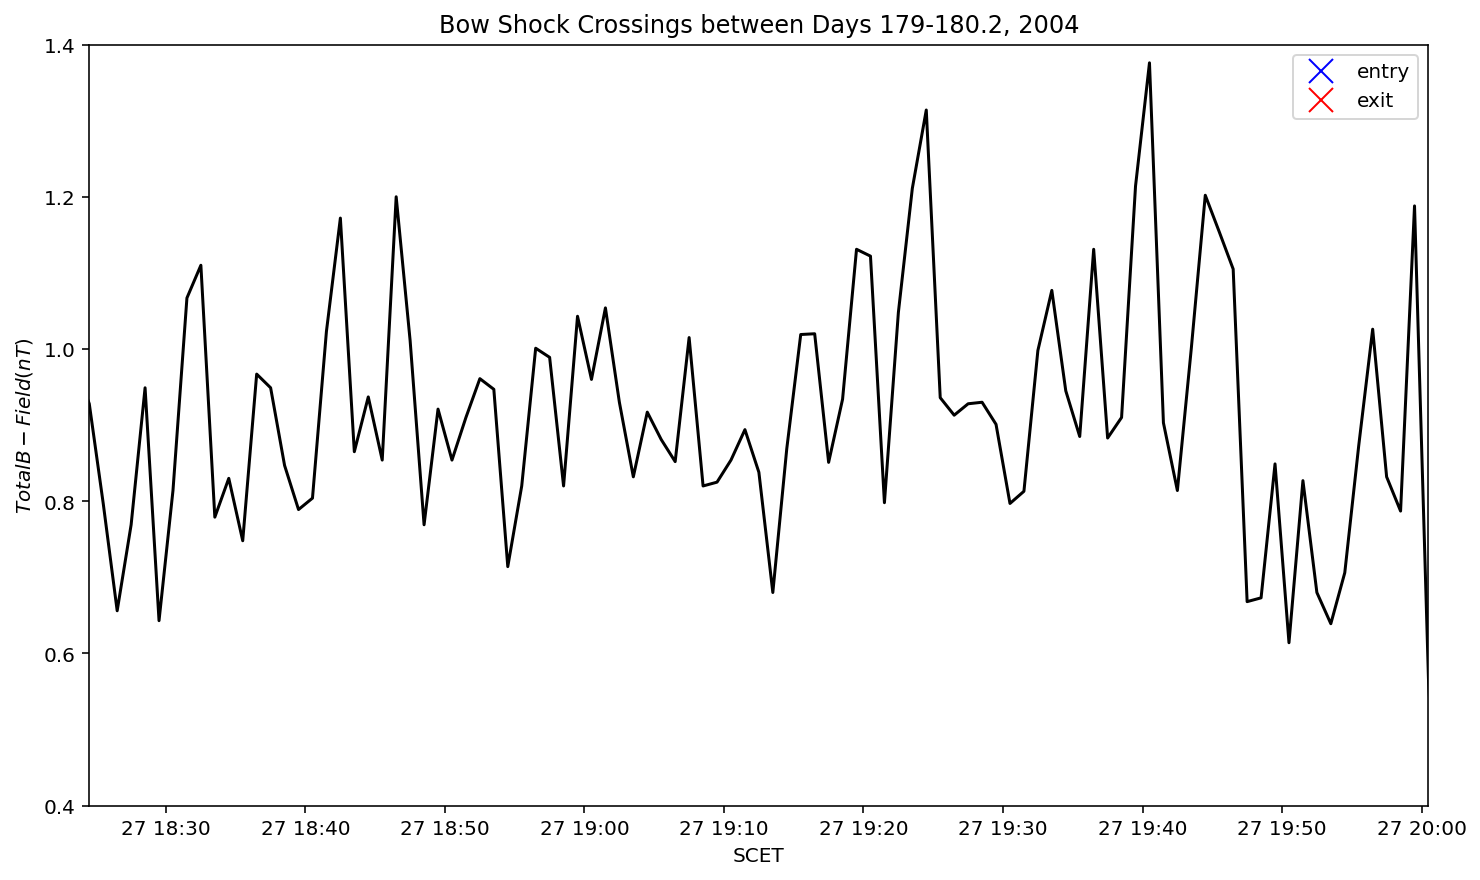

In [48]:
#TEST
windowsize = 7
estimatedNumCrossings = 7
year = 2004
start_day = 179
end_day = 180.2

first_day = datetime(int(year), 1, 1)

start_dateBD = pd.Timestamp(first_day + timedelta(start_day-0.25+1/60, 30))
end_dateBD = pd.Timestamp(first_day + timedelta(start_day-0.15-1/60, 30))
day_data_2004 = get_day_data(start_day, end_day, year)

entries, exits, ax, ksm_co = identify_crossings_2(day_data_2004, windowsize, estimatedNumCrossings)
plt.ylim(0.4,1.4)
plt.xlim([start_dateBD, end_dateBD])
#ax.show()

#print("Estimated Entry Dates for Days 179-180, 2004: \n",entries)
#print("Estimated Exit Dates for Days 179-180, 2004: \n",exits)

In [49]:
# finds entry and exit points of bow shock crossings shown above.
cross_array = []
for i in range(len(entries)):
    entry = str(entries[i].strftime('%Y-%m-%d %H:%M:%S'))
    exit = str(exits[i].strftime('%Y-%m-%d %H:%M:%S'))
    cross_array.append(entry)
    cross_array.append(exit)
print(cross_array)

['2004-06-27 09:46:30', '2004-06-27 10:29:30', '2004-06-27 18:03:30', '2004-06-27 20:01:30', '2004-06-28 00:17:30', '2004-06-28 02:58:30']


We need 64 shock angle values. This is obtained by using the cross product of each BU value with each BD value (8x8=64 values).

In [50]:
# extracts magnetic field data withing the detected bow shock crossings to obtain both upstream and downstream magnetic field vectors.
start_date=str(start_dateBD.strftime('%Y-%m-%d %H:%M:%S'))
end_date=str(end_dateBD.strftime('%Y-%m-%d %H:%M:%S'))
B1 = extract_B_vector(start_date, end_date, day_data_2004)# the first interval after the first crossing---BD
B2 = extract_B_vector(cross_array[1], cross_array[2], day_data_2004)# the interval between the second and third crossing---BU

# divides the magnetic field data into 8 equally spaced subintervals. ave_BD and ave_BU takes the average of the magnetic field within these subintervals.
divided_BD_vector = divide(B1, 8)
divided_BU_vector = divide(B2, 8)
ave_BD = average_B(divided_BD_vector)
ave_BU = average_B(divided_BU_vector)

# calculates 64 coplanarity normals and shock values for each possible combination from both sets of BU and BD values.
ncp, shock_value = subinterval_values(ave_BU,ave_BD)

# calculates the average shock value and its standard deviation.
ave_shock = np.sum(shock_value)/len(shock_value)
print(f"S2 θ_BN value = {ave_shock}")# value for S2
std = np.sqrt(np.sum((shock_value - ave_shock)**2/len(shock_value)))
print(f"S2 Standard deviation = {std}")
ave_ncp = sum(ncp)/len(ncp)
print(f"nCP = {ave_ncp}")

S2 θ_BN value = 43.90249085164946
S2 Standard deviation = 25.680555604486596
nCP = [-0.35279826  0.78779151  0.27661864]


In [51]:
B3 = extract_B_vector(cross_array[1], cross_array[2], day_data_2004)# ---BU
B4 = extract_B_vector(cross_array[2], cross_array[3], day_data_2004)# ---BD
divided_BD_vector4 = divide(B4, 8)
divided_BU_vector3 = divide(B3, 8)
ave_BD = average_B(divided_BD_vector4)
ave_BU = average_B(divided_BU_vector3)
ncp, shock_value = subinterval_values(ave_BU,ave_BD)
ave_shock = np.sum(shock_value)/len(shock_value)
print(f"S3 θ_BN value = {ave_shock}")# value for S3
std = np.sqrt(np.sum((shock_value - ave_shock)**2/len(shock_value)))
print(f"S3 Standard deviation = {std}")

S3 θ_BN value = 44.28865287915735
S3 Standard deviation = 25.637983164151095


In [52]:
B5 = extract_B_vector(cross_array[2], cross_array[3], day_data_2004)# ---BD
B6 = extract_B_vector(cross_array[3], cross_array[4], day_data_2004)# ---BU
divided_BD_vector5 = divide(B5, 8)
divided_BU_vector6 = divide(B6, 8)
ave_BD = average_B(divided_BD_vector5)
ave_BU = average_B(divided_BU_vector6)
ncp, shock_value = subinterval_values(ave_BU,ave_BD)
ave_shock = np.sum(shock_value)/len(shock_value)
print(f"S4 θ_BN value = {ave_shock}")# value for S4
std = np.sqrt(np.sum((shock_value - ave_shock)**2/len(shock_value)))
print(f"S4 Standard deviation = {std}")

S4 θ_BN value = 44.475714222398196
S4 Standard deviation = 18.249112215423896


# Discussion:
1. When extracting data base on the crossing dates, we managed to exclude the data on that time. 
2. Should we use the average of the 64 estimates for θ and ncp?

Answer: On the paper it said it used a small time period around 5min and divided that into 8 subintervals, but the data they used was 1 s resolution. In our case, we used 1 min resolution so we may need to choose a longer time period (maybe choose manually)

Zake's orbit 3rd orbit of 2005 

->entry into magnetosheath dates:(2005-03-01 to 2005-03-02) and (2005-03-04 14:00:30 to 2005-03-04 20:30:30) and (2005-03-05 15:00:30 to 2005-03-05 18:30:30)

->exit out of magnetosheath dates :(2005-03-14 19:32:30 to 2005-03-15 02:45:30) and (2005-03-16 02:00:30 to 2005-03-16 03:00:30) and (2005-03-16 21:30:30 2005-03-17 10:00:30)

->other interesting dates not sure if we can analyse: (2005-03-15 02:00:30 to 2005-03-15 21:00:30)

Note by Kejian:

Day 171-176 2005 is also a very good period for analyzing.
